# Case study 1 : Breast Cancer  

The goal of this project is to construct a machine learning model that can precisely forecast if a tumor in the breasts is benign or malignant based on the Breast Cancer Wisconsin (Diagnostic) data set. Since the data set includes a lot of features that might not all be equally beneficial to the accuracy of the forecast, the emphasis is on feature selection, the most informative variables that maximize performance and reduce complexity.


In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [467]:
%pip install ucimlrepo

In [468]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [469]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [470]:
breast_cancer = breast_cancer_wisconsin_diagnostic

In [471]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
breast_cancer = load_breast_cancer()

# Convert to DataFrame
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["target"] = breast_cancer.target  # add labels

# Show first 5 rows
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Exploration

In [472]:
breast_cancer_df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [473]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
breast_cancer = load_breast_cancer()

# Convert to DataFrame
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["target"] = breast_cancer.target  # add labels

# Convert 'target' column to categorical
breast_cancer_df['target'] = breast_cancer_df['target'].astype('category')

# Display the data types to confirm the change
display(breast_cancer_df.dtypes)

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


- Insight :


The target variable was represented as integers (0 and 1). To avoid confusion as well as correct classification treatment, it had been converted to a categorical feature of the two tumor class labels:  Benign (0) and Malignant (1). This will make the model perceive it as a classification, rather than numerical regression, problem.



# SEMMA

In [474]:
breast_cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [475]:
breast_cancer_df.shape

(569, 31)

The data set consists of 569 rows and 31 columns, representing 569 patient records and 30 patient diagnostics features along with one variable indicating that the tumor is either benign or malignant.





In [476]:
# Calculate the mode for each numerical column
numerical_cols = breast_cancer_df.select_dtypes(include=np.number).columns
mode_row = breast_cancer_df[numerical_cols].mode().iloc[0] # .mode() can return multiple modes, take the first
mode_row.name = 'mode' # Name the new row 'mode'

# Get the standard description
description_df = breast_cancer_df.describe()

# Append the mode row to the description DataFrame
description_df_with_mode = pd.concat([description_df, mode_row.to_frame().T])

# Display the updated description
display(description_df_with_mode)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
mode,12.340000,14.930000,82.610000,512.200000,0.100700,0.114700,0.000000,0.000000,0.160100,0.056670,...,12.360000,17.700000,101.700000,284.400000,0.121600,0.148600,0.000000,0.000000,0.222600,0.074270


All 30 numeric features are present with no missing values. The standard deviations as well as the mean demonstrate high variability across features, and some demonstrate high ranges along with right-skewing distribution, justifying the requirement to scale before modeling.



In [477]:
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [478]:
for col in breast_cancer_df.columns:
    print(f"Column Name: {col}")
    print(breast_cancer_df[col].head())
    print("-" * 30)

Column Name: mean radius
0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: mean radius, dtype: float64
------------------------------
Column Name: mean texture
0    10.38
1    17.77
2    21.25
3    20.38
4    14.34
Name: mean texture, dtype: float64
------------------------------
Column Name: mean perimeter
0    122.80
1    132.90
2    130.00
3     77.58
4    135.10
Name: mean perimeter, dtype: float64
------------------------------
Column Name: mean area
0    1001.0
1    1326.0
2    1203.0
3     386.1
4    1297.0
Name: mean area, dtype: float64
------------------------------
Column Name: mean smoothness
0    0.11840
1    0.08474
2    0.10960
3    0.14250
4    0.10030
Name: mean smoothness, dtype: float64
------------------------------
Column Name: mean compactness
0    0.27760
1    0.07864
2    0.15990
3    0.28390
4    0.13280
Name: mean compactness, dtype: float64
------------------------------
Column Name: mean concavity
0    0.3001
1    0.0869
2    0.1974
3    0.2414
4 

In [479]:
print(breast_cancer_df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: category
Categories (2, int64): [0, 1]


In [480]:
breast_cancer_df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


The dataset is clean, with no missing values across any of the 30 features, making it ready for preprocessing and analysis without additional data cleaning.



#EDA

# Univariate Analysis

## Histograms

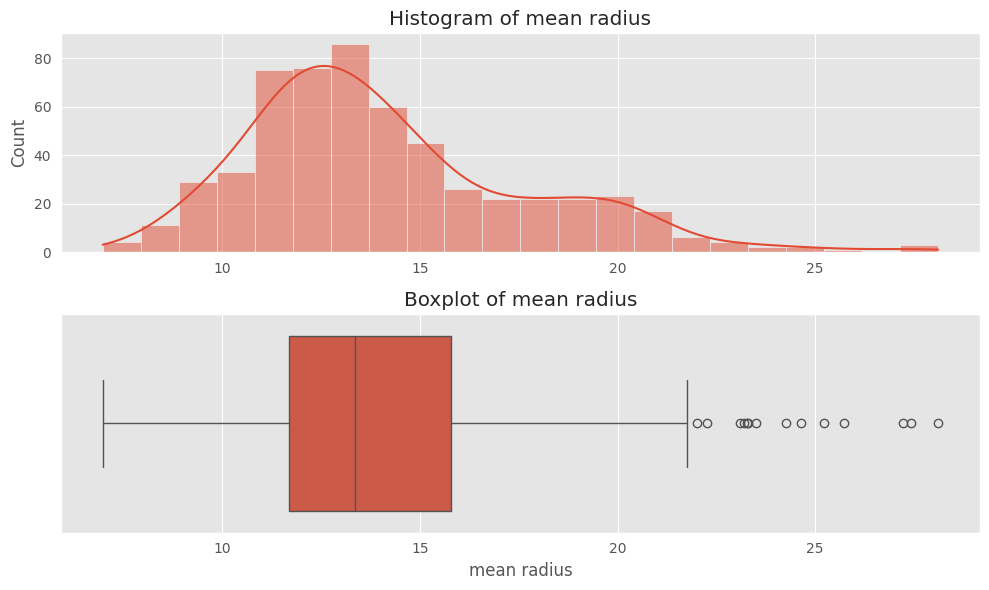

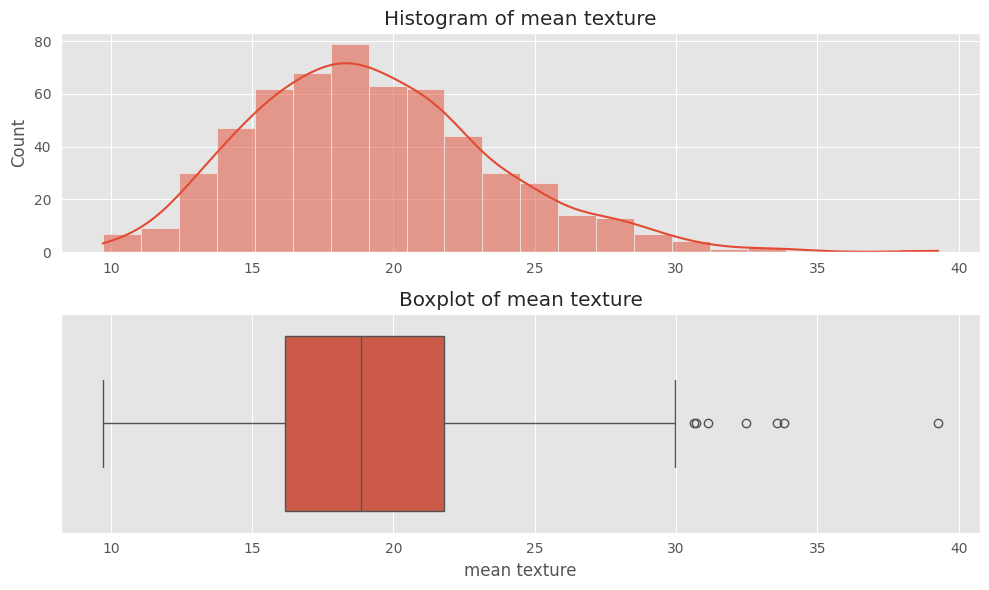

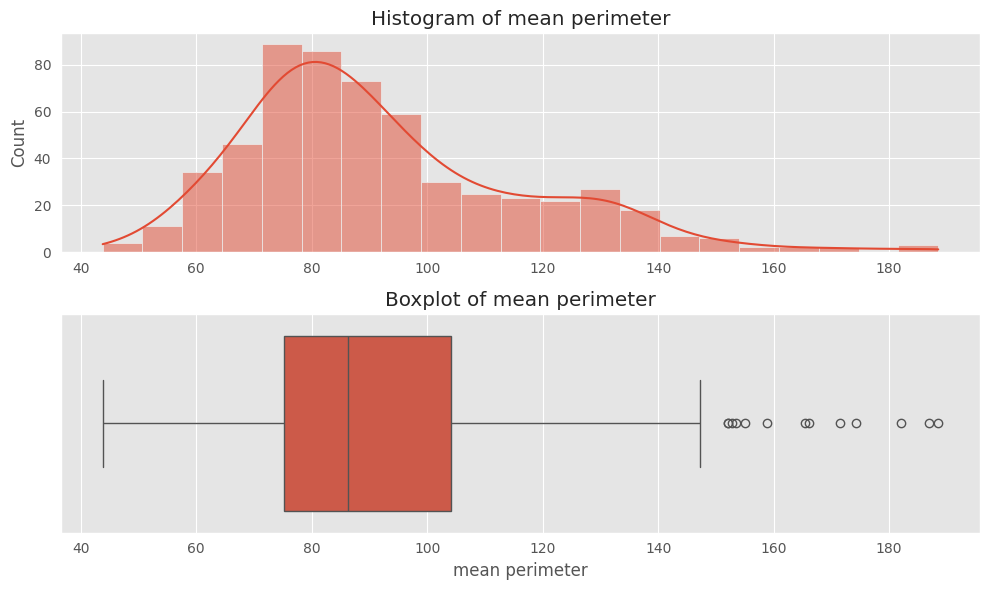

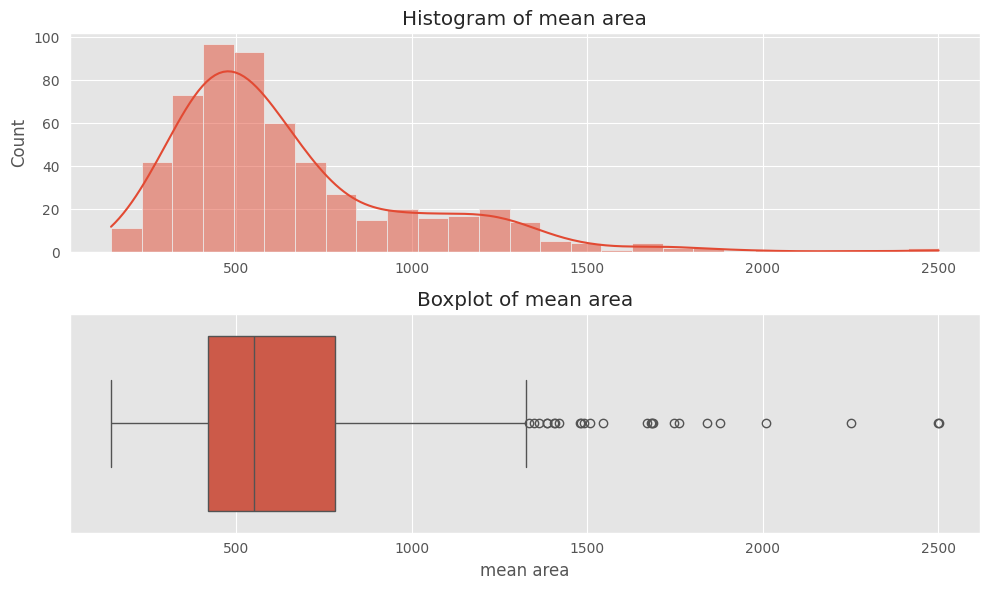

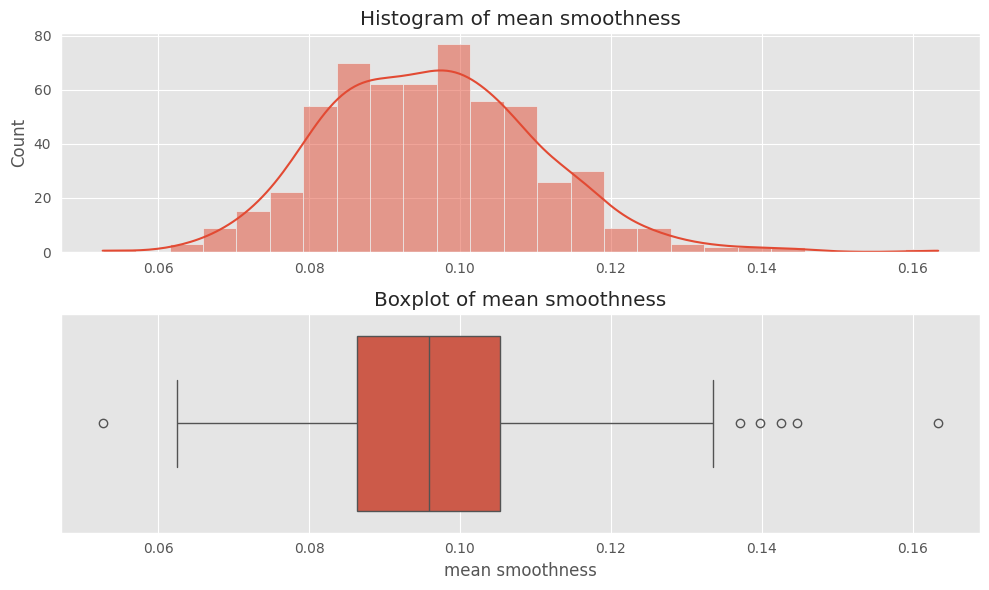

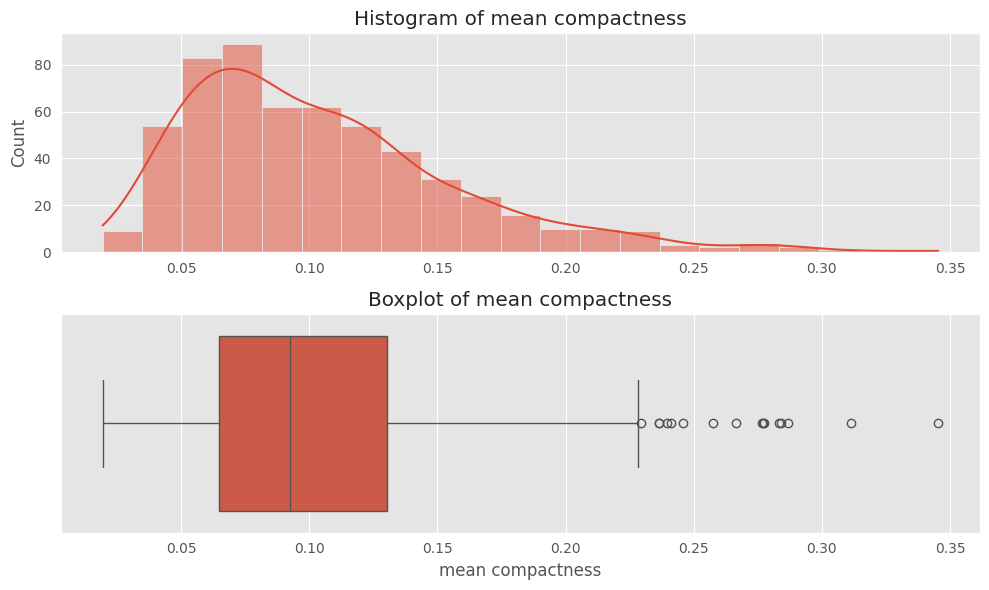

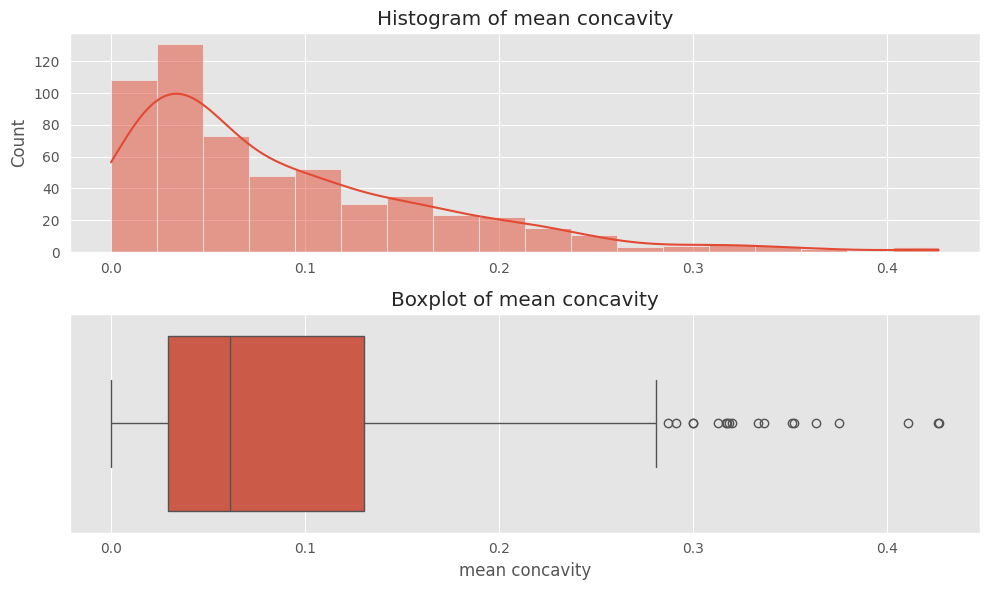

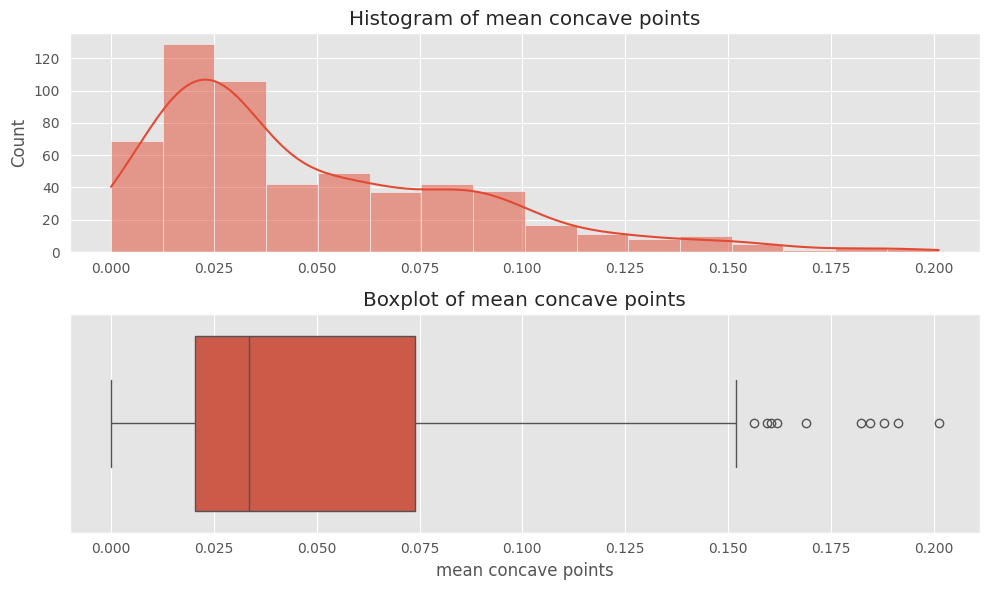

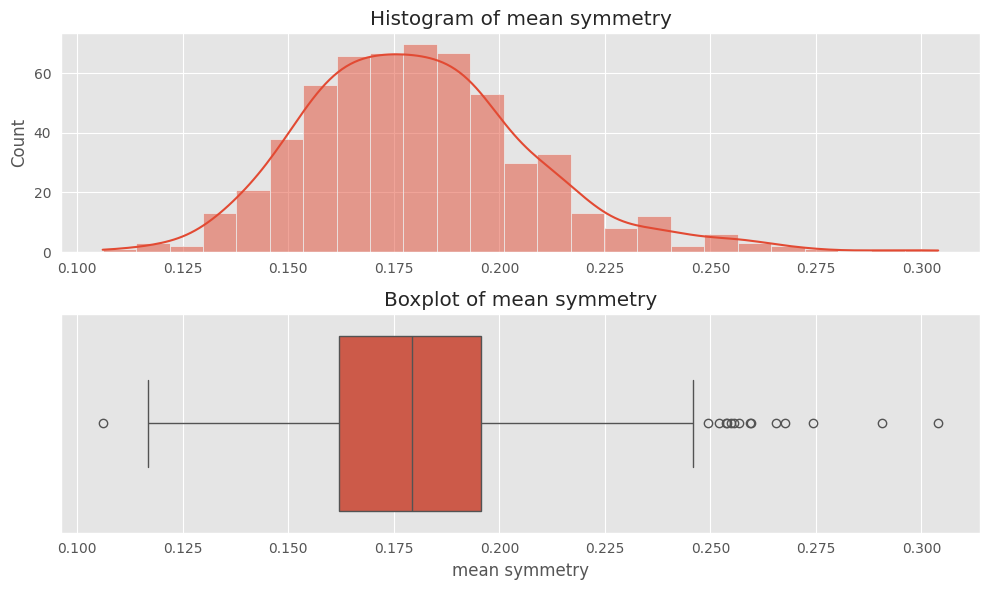

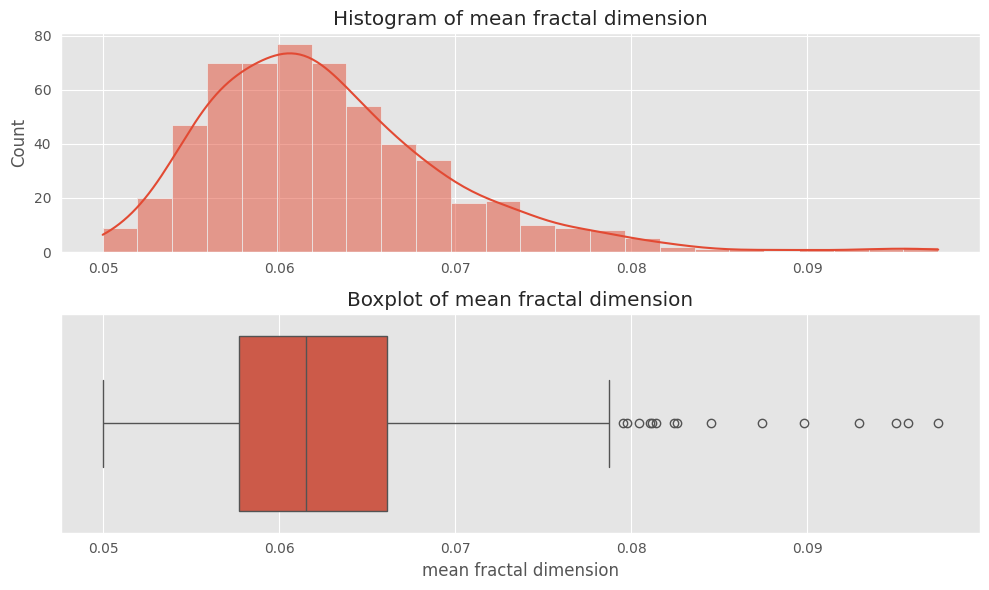

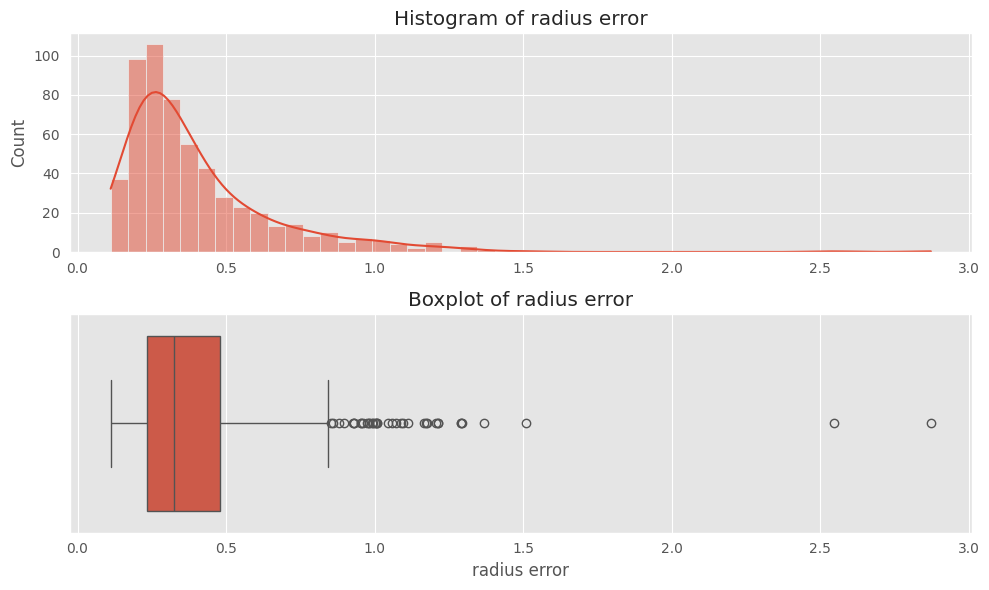

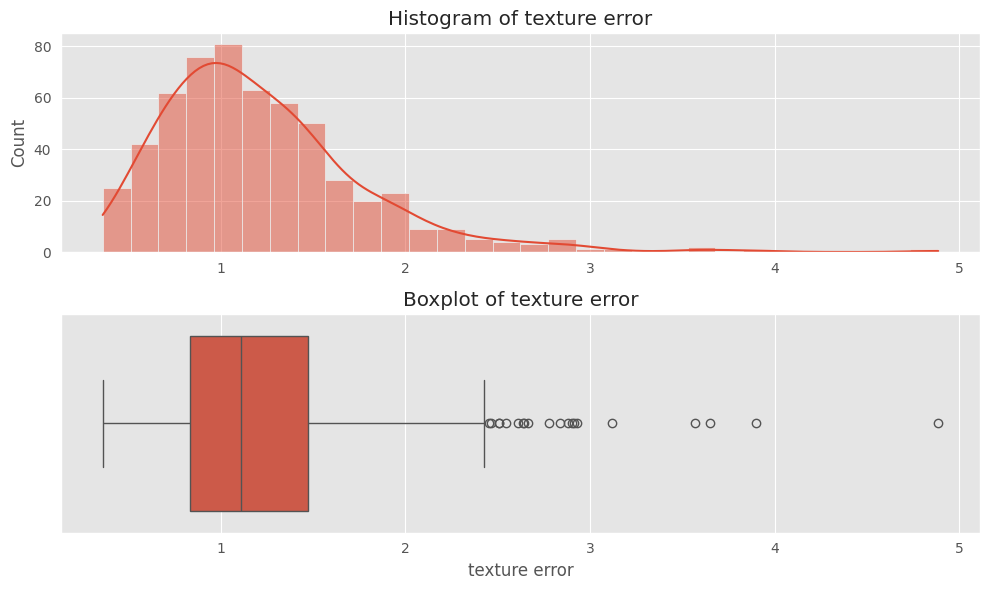

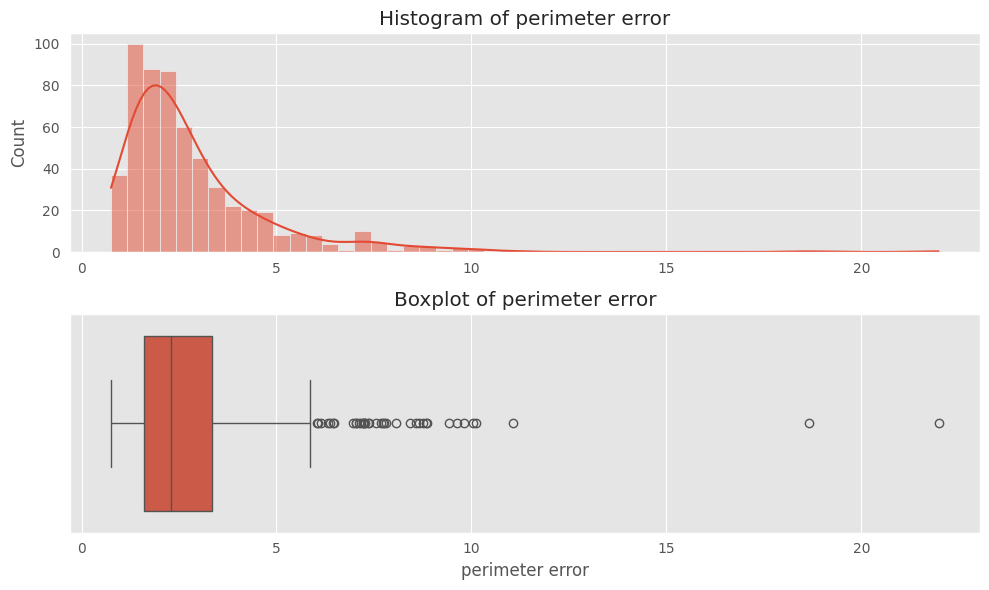

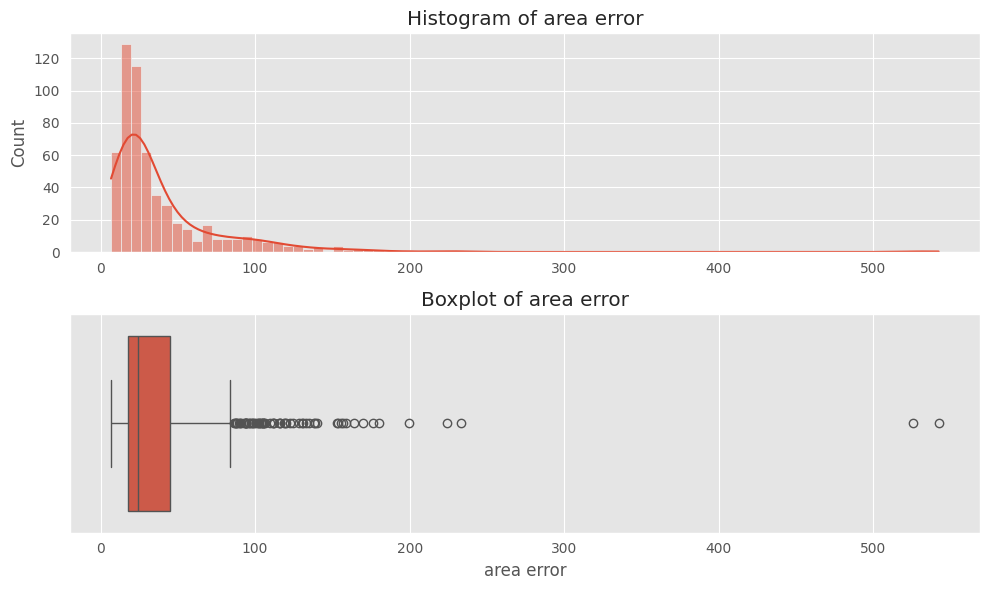

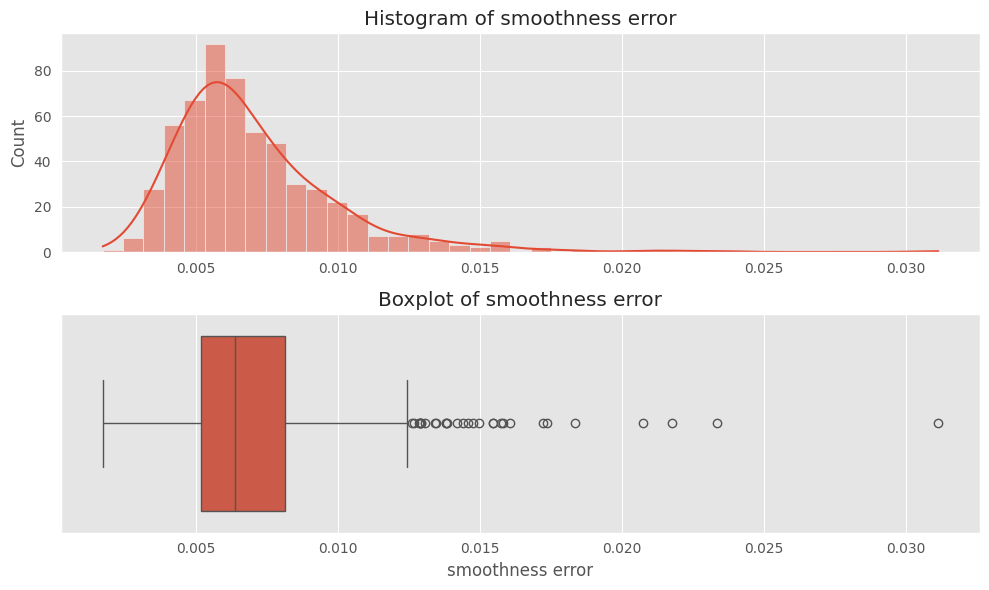

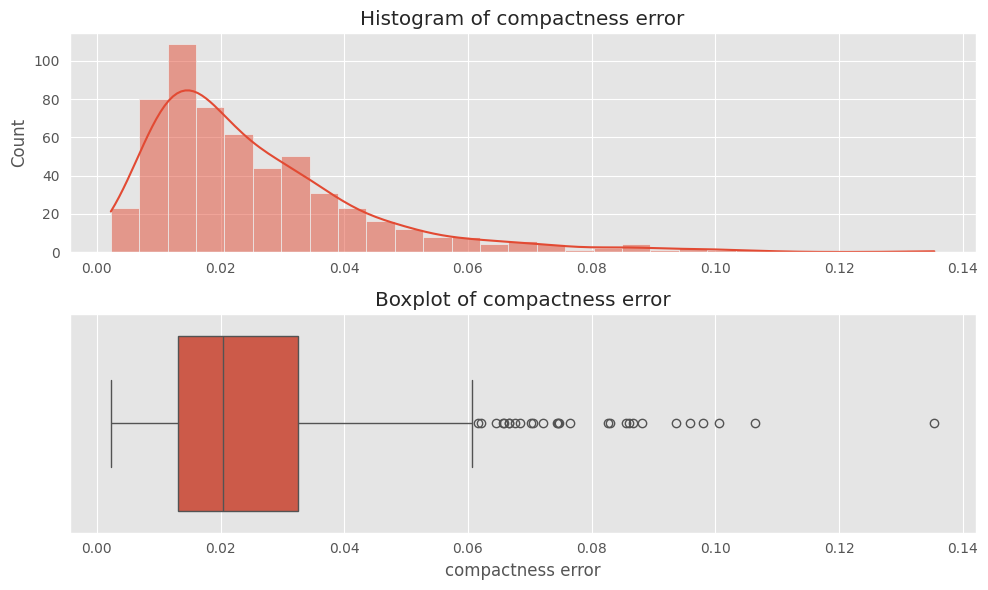

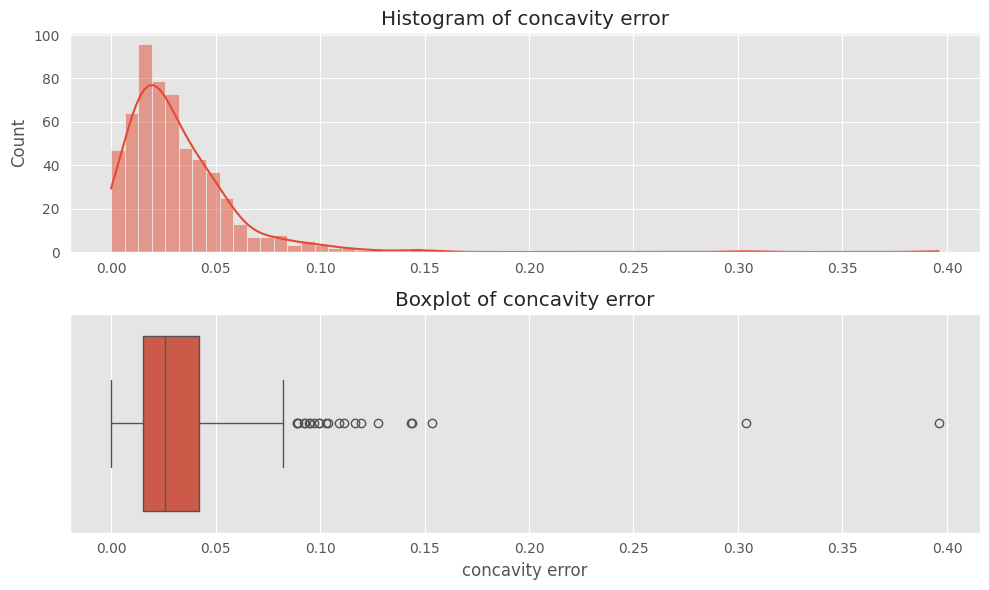

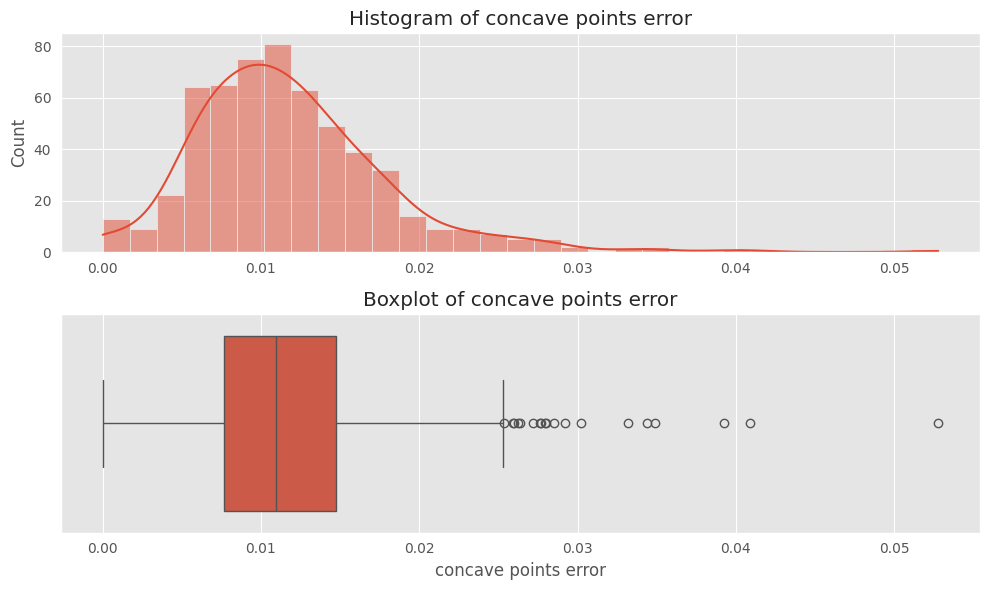

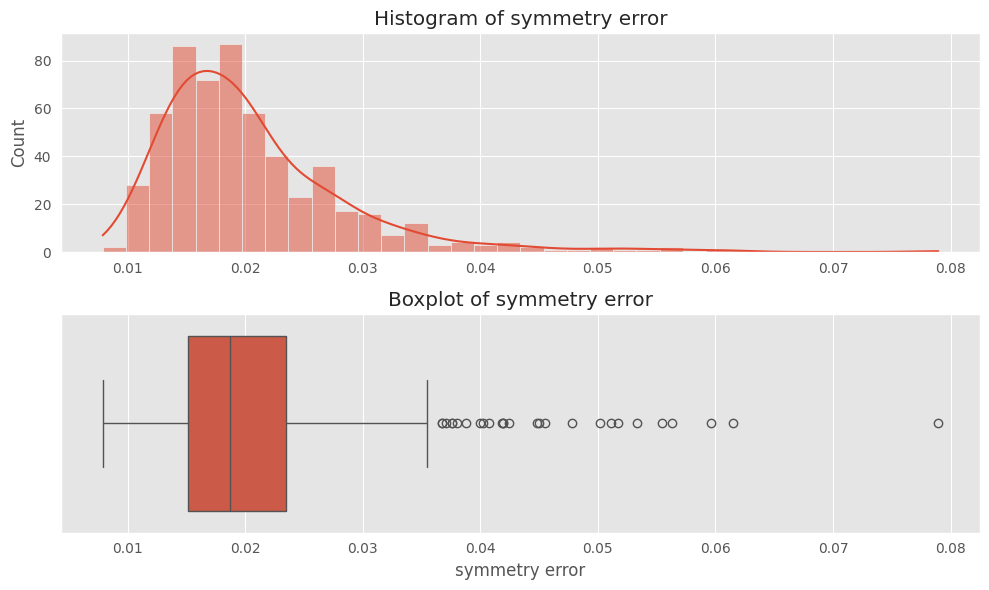

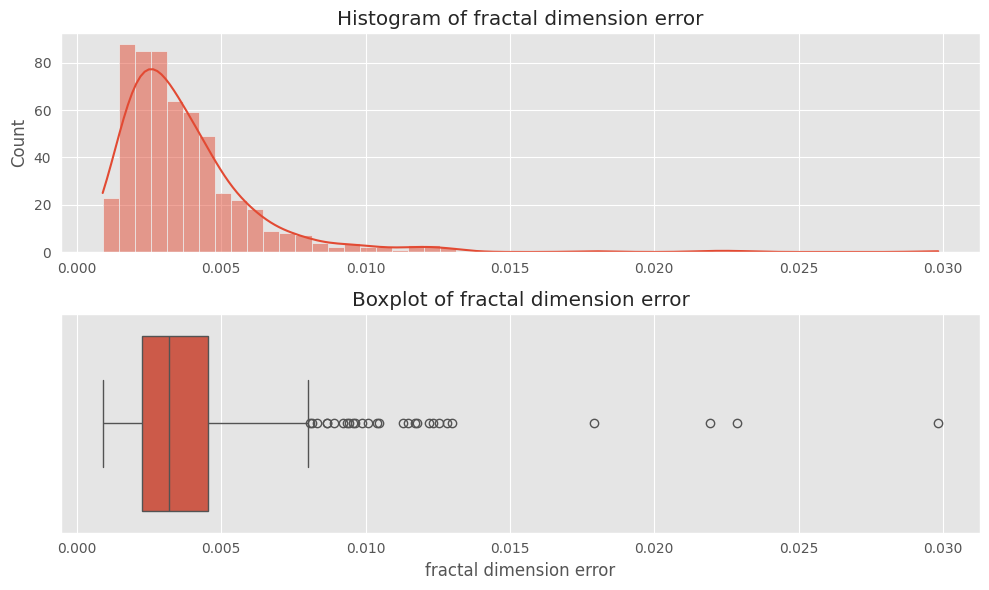

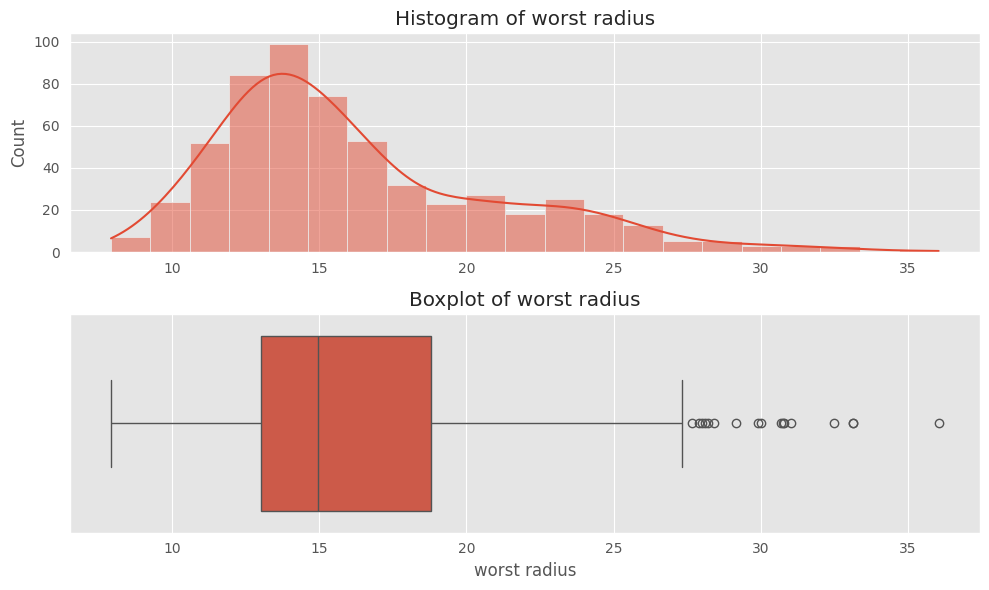

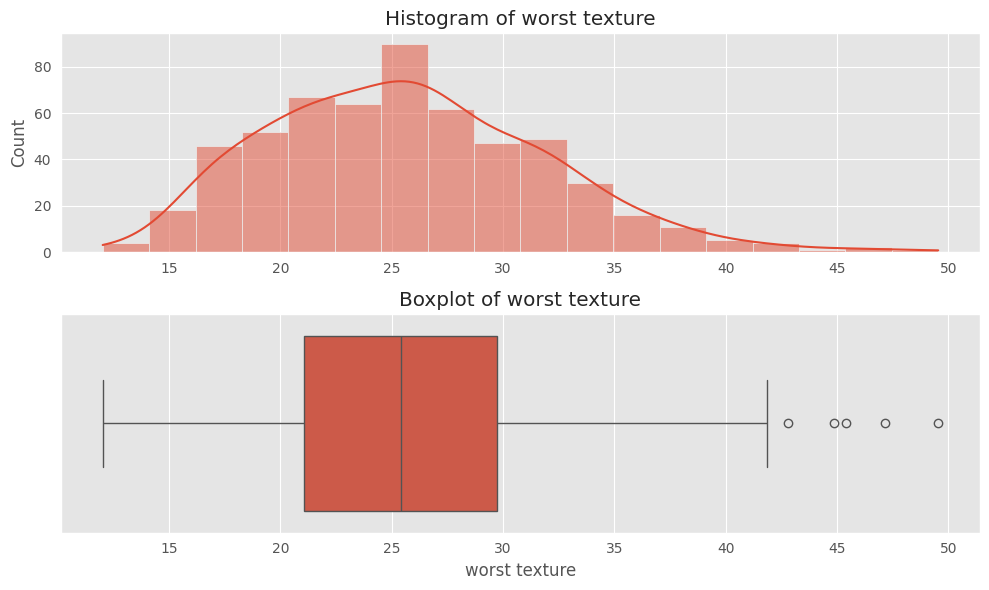

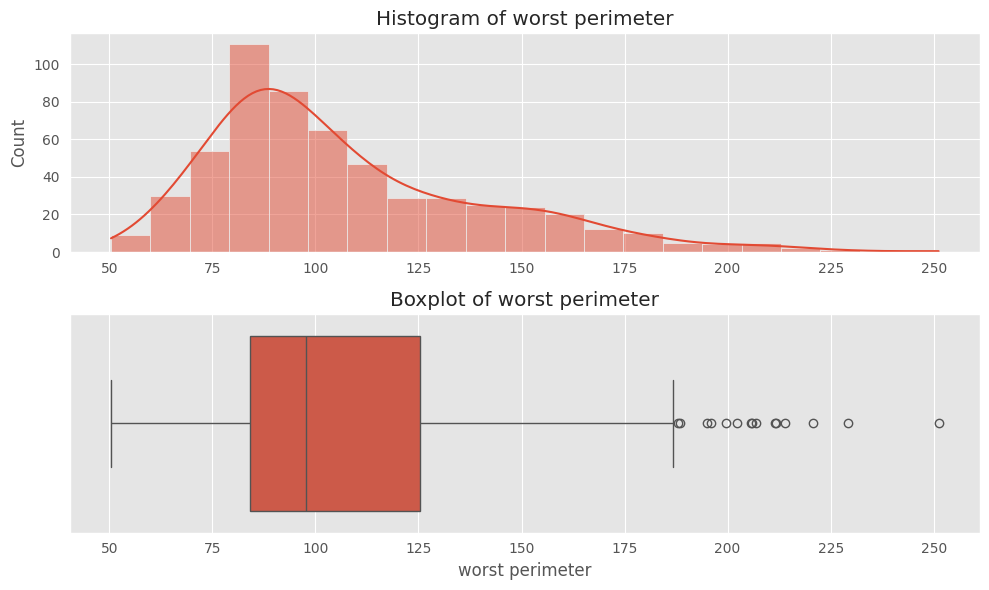

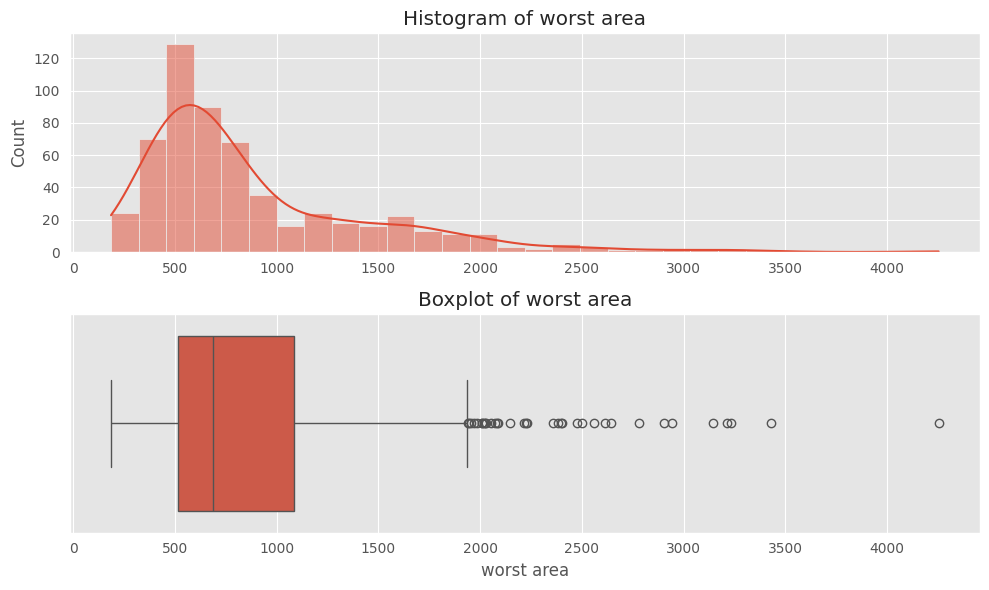

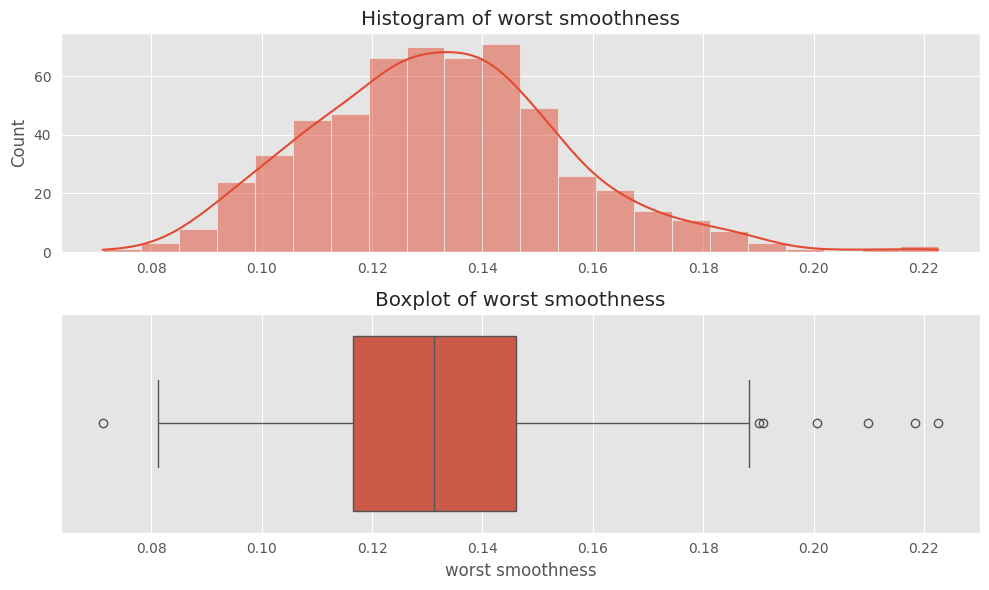

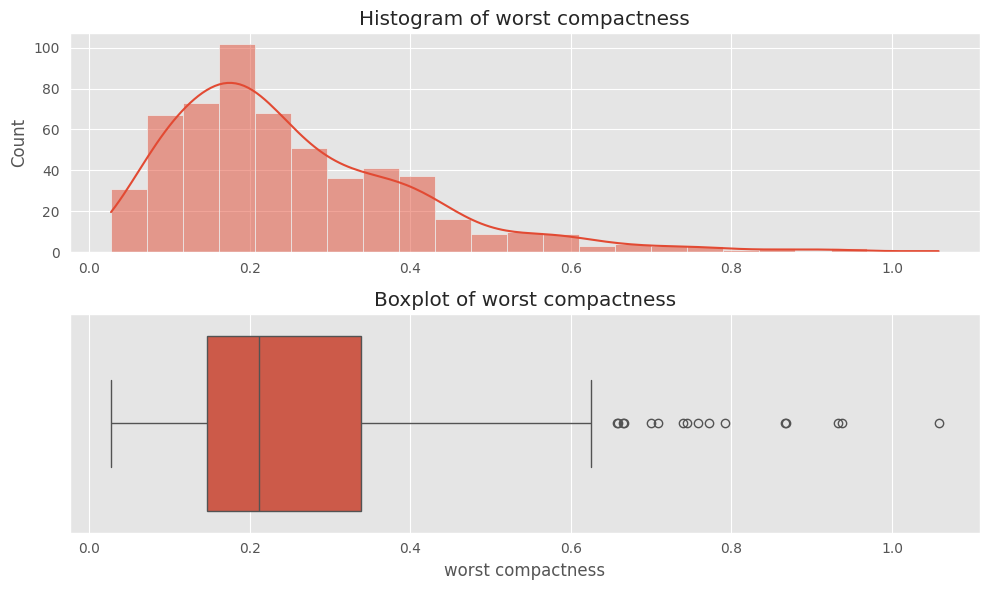

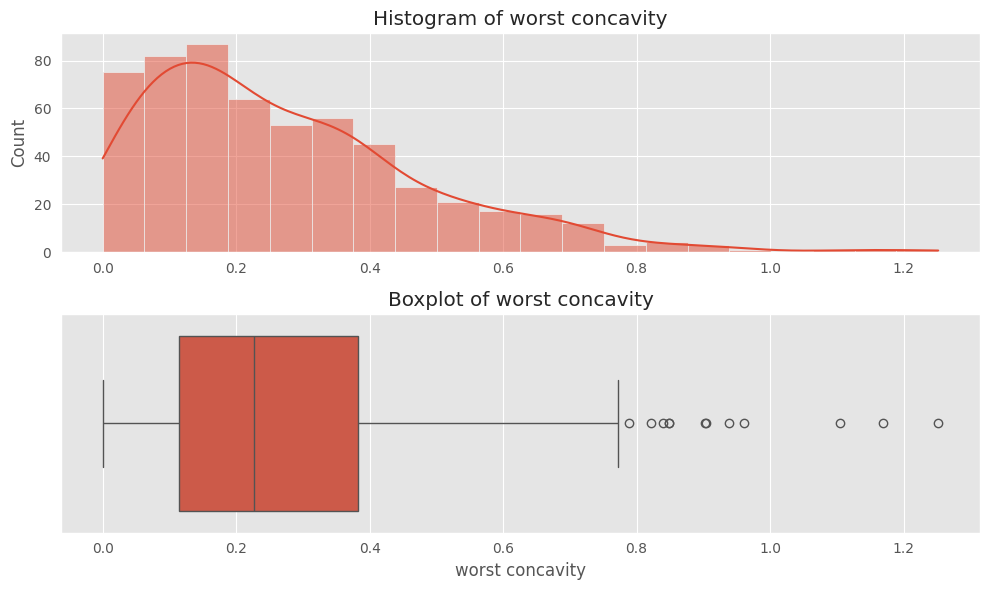

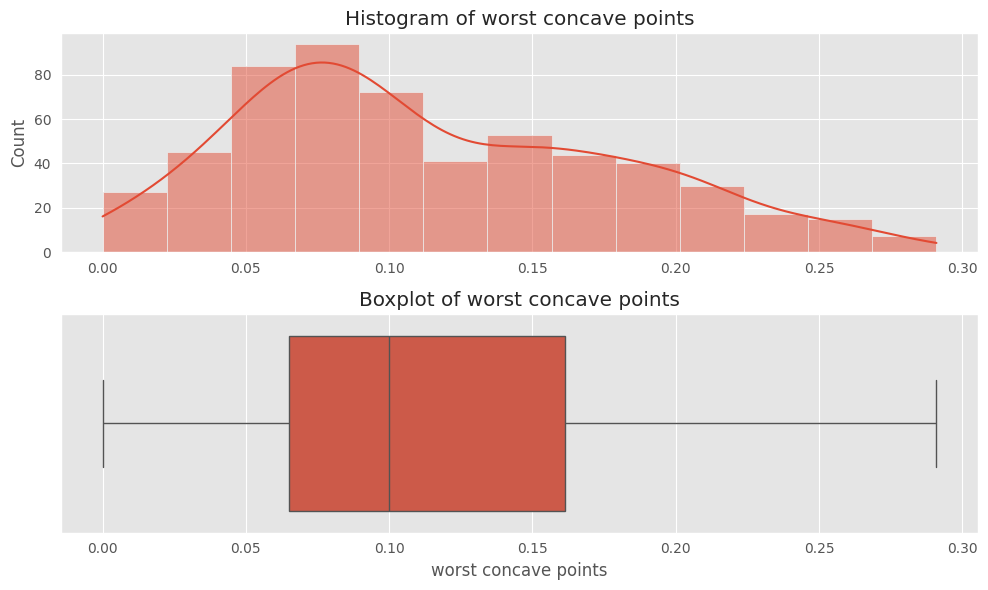

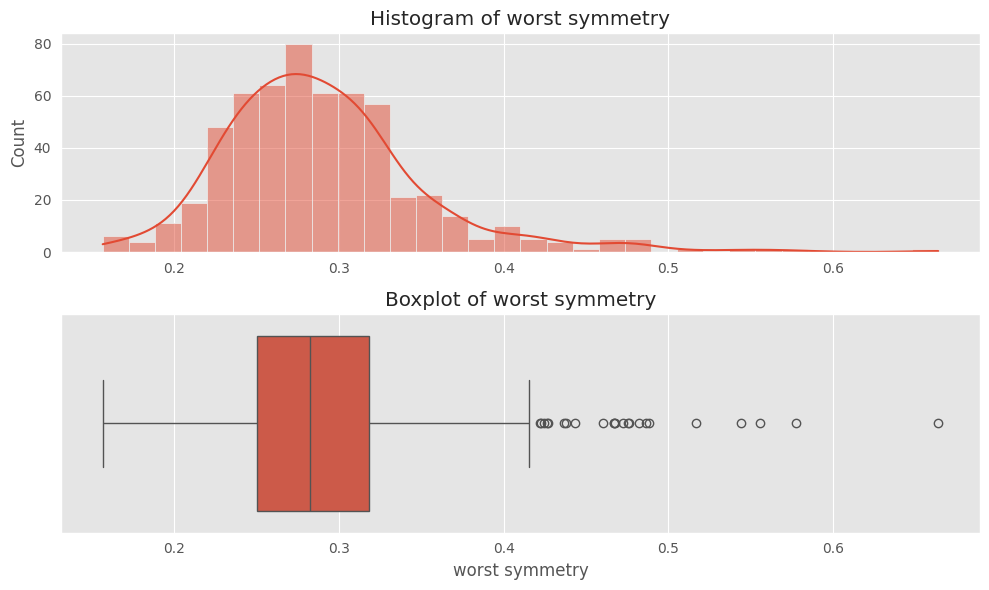

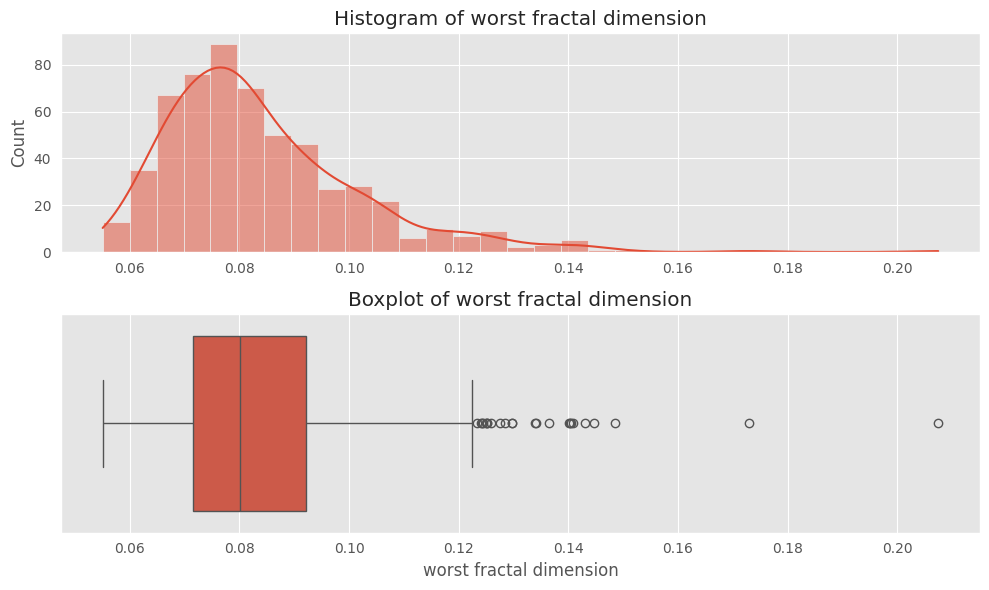

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns (excluding the target)
numerical_cols = breast_cancer_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# The line below is removed as 'target' is already excluded by select_dtypes after conversion to category
# numerical_cols.remove('target')

# Create histograms with boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(data=breast_cancer_df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('')

    # Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(data=breast_cancer_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

* The majority of the features within the data set are right-skewed, which implies that the large values are rarer. Some features like mean texture, mean smoothness, and mean symmetry seem almost normally distributed, but some features like mean radius, mean perimeter, and mean area are bimodally distributed or right-skewed to a certain extent.

* These mean radius, mean perimeter, and mean area features all adhere to highly comparable schemes, showing potential multicollinearity—they very likely specify connected size characteristics of the tumors. They can carry the same information though being different in scale yet still can convey useful variance with the assistance of regularization or feature selection.

* Overall, the histograms confirm that the dataset contains mostly continuous numeric variables, with many requiring scaling and potentially dimensionality reduction to avoid redundancy and improve model stability.


In [482]:
# Get categorical columns
categorical_cols = breast_cancer_df.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    print("Categorical Columns:")
    for col in categorical_cols:
        print(f"\nColumn Name: {col}")
        print("Value Counts:")
        print(breast_cancer_df[col].value_counts())
        print("-" * 30)
else:
    print("No categorical columns found in the DataFrame.")

# Check the 'target' column specifically as it's int64 but represents categories
print("\nTarget Column Value Counts:")
print(breast_cancer_df['target'].value_counts())

Categorical Columns:

Column Name: target
Value Counts:
target
1    357
0    212
Name: count, dtype: int64
------------------------------

Target Column Value Counts:
target
1    357
0    212
Name: count, dtype: int64


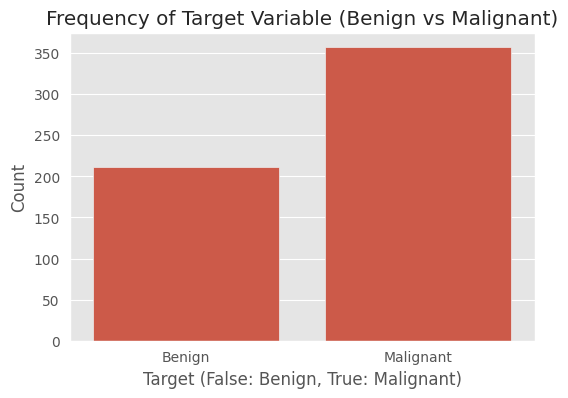

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=breast_cancer_df)
plt.title('Frequency of Target Variable (Benign vs Malignant)')
plt.xlabel('Target (False: Benign, True: Malignant)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

In [484]:
breast_cancer_df.describe(include="category")

,target
count,569
unique,2
top,1
freq,357


The target variable is two categories : Malignant (1), Benign (0)


Over 569 patient records. The malignancy cases appear to be the most frequent (357 instances), making the class slightly imbalanced towards benign cases, with necessary adjustments to be made to the model during the learning as well as evaluation phases.

# Bivariate Analysis

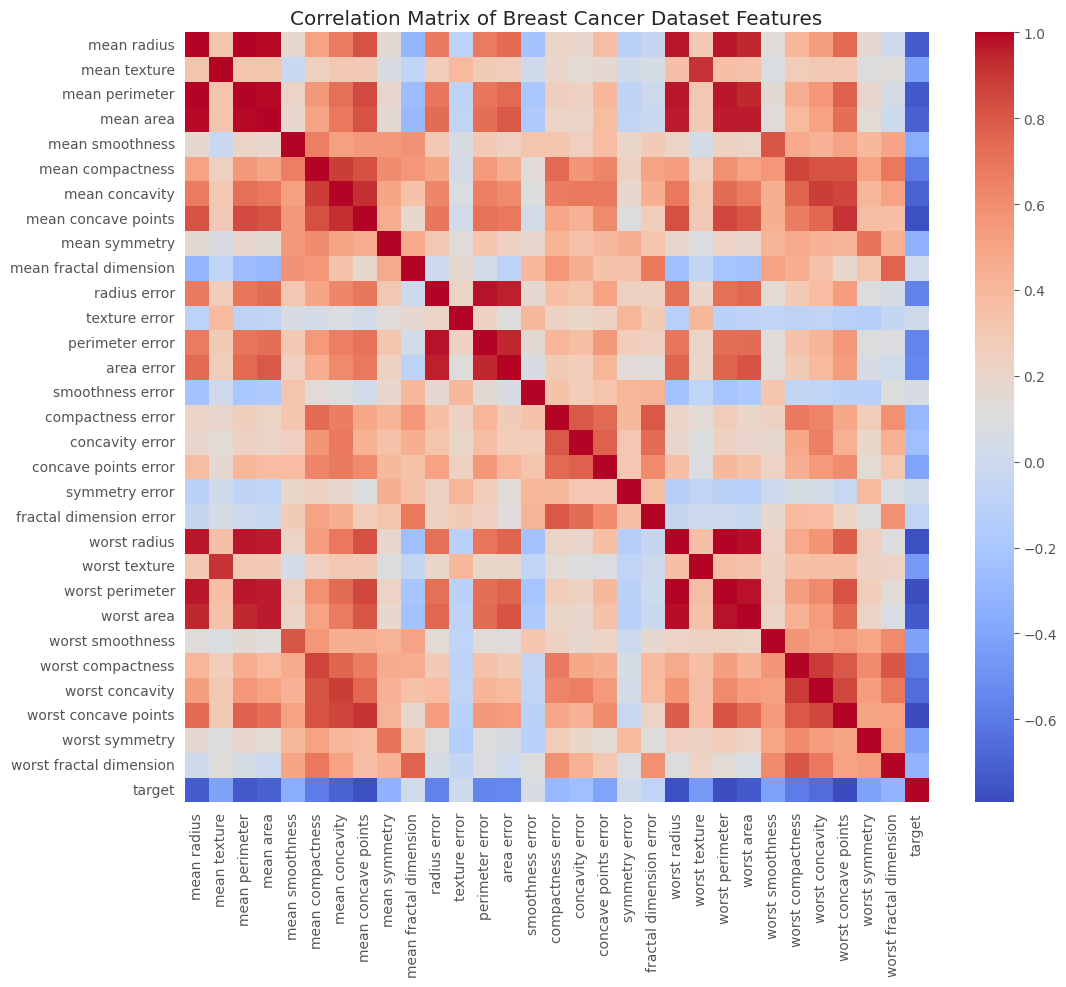

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = breast_cancer_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
plt.show()

The entire correlation matrix doesn't show a noticeable pattern because the number of features is too high. So, to get a better idea of the relationship, we will move on to checking the top 10 best and the bottom 10 worst with the target feature.

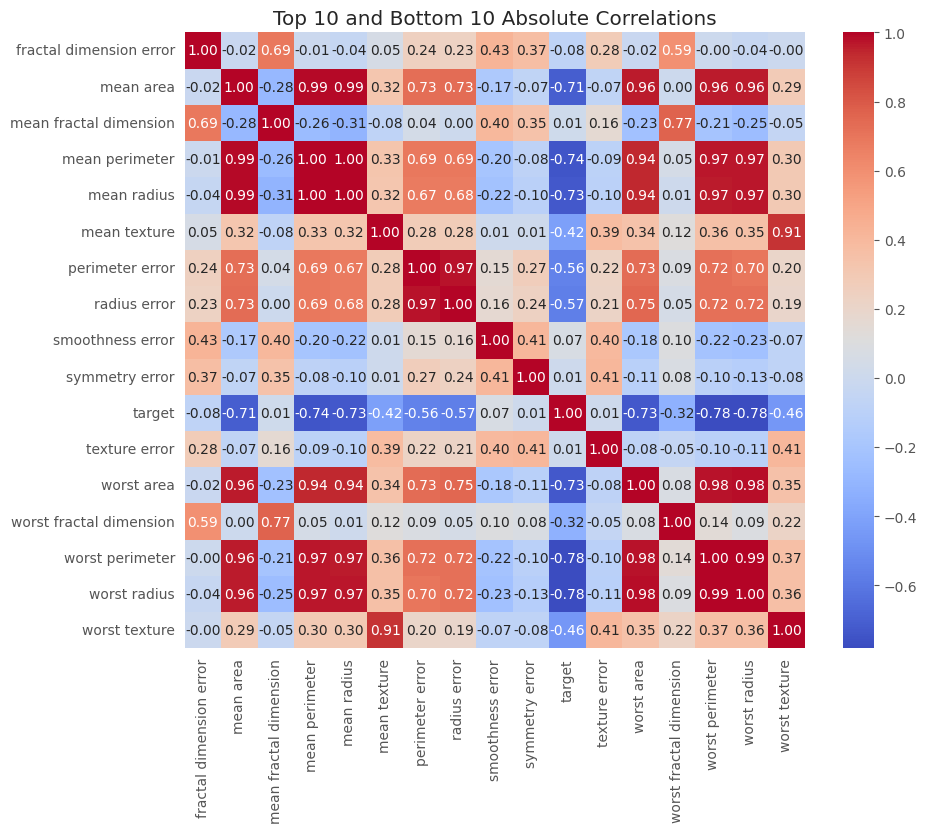


Top 10 Absolute Correlations:
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst perimeter  worst area         0.977578
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
mean radius      worst radius       0.969539
mean perimeter   worst radius       0.969476
dtype: float64

Bottom 10 Absolute Correlations:
mean texture             symmetry error             0.009127
texture error            target                     0.008303
mean radius              worst fractal dimension    0.007066
mean texture             smoothness error           0.006614
symmetry error           target                     0.006522
mean perimeter           fractal dimension error    0.005523
mean area                worst fractal dimension    0.003738
fractal dimension error  worst texture     

In [486]:
# Assuming breast_cancer_df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = breast_cancer_df.corr()

# 1. Get the correlation matrix as a Series, dropping self-correlations and duplicates
# Use np.triu to get the upper triangle, exclude diagonal (k=1), then unstack/stack and drop NaNs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_series = upper_tri.stack()

# 2. Get the correlations in absolute value and sort them
abs_correlation_series = correlation_series.abs().sort_values(ascending=False)

# 3. Get the top 10 largest and bottom 10 smallest absolute correlations
top_10_abs = abs_correlation_series.head(10)
bottom_10_abs = abs_correlation_series.tail(10)
top_bottom_20_abs = pd.concat([top_10_abs, bottom_10_abs])

# To get the original correlation values for the heatmap, we'll use the indices
top_bottom_20 = correlation_series.loc[top_bottom_20_abs.index]


# 4. Get the unique feature names involved in these top/bottom absolute correlations
features_to_plot = sorted(list(set(
    [item[0] for item in top_bottom_20.index] +
    [item[1] for item in top_bottom_20.index]
)))

# 5. Filter the original correlation matrix to include only these features
# This creates a smaller, filtered correlation matrix
filtered_matrix = correlation_matrix.loc[features_to_plot, features_to_plot]

# 6. Display the filtered correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
# Set annot=True now that the matrix is smaller, for readability
sns.heatmap(filtered_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 and Bottom 10 Absolute Correlations')
plt.show()

# Optional: Print the top/bottom absolute correlations as a list for clarity
print("\nTop 10 Absolute Correlations:")
print(top_10_abs)
print("\nBottom 10 Absolute Correlations:")
print(bottom_10_abs)

**Top & Bottom Correlation Observations**:

The top three correlations are:

1. Mean radius - Mean perimeter (0.998)

2. Worst radius - Worst perimeter (0.994)

3. Mean radius - Mean area (0.987)

These highest correlations are between size variables such as mean radius, mean perimeter, mean area, and their worst counterparts with values all above 0.96. This implies that these measurements are highly related, actually describing essentially the same geometrical quantity for the tumor.

The bottom three correlations are:

1. Worst fractal dimension - Area error (0.018)

2. Symmetry error - Worst smothness (0.013)

3. Mean texture - Symmetry error (0.009)

The weakest correlations near zero are between values of such things as area error and worst fractal dimension, or mean texture and smoothness error. The measures are unrelated to one another in a lineal fashion, presumably indicating that they are capturing different things about the tumor, as texture or irregularity, but not size.


In general, the matrix supports that the radius, perimeter, and area are redundant predictors, but the features related to texture and dimensions can present complimentary, less-correlated information to the model.

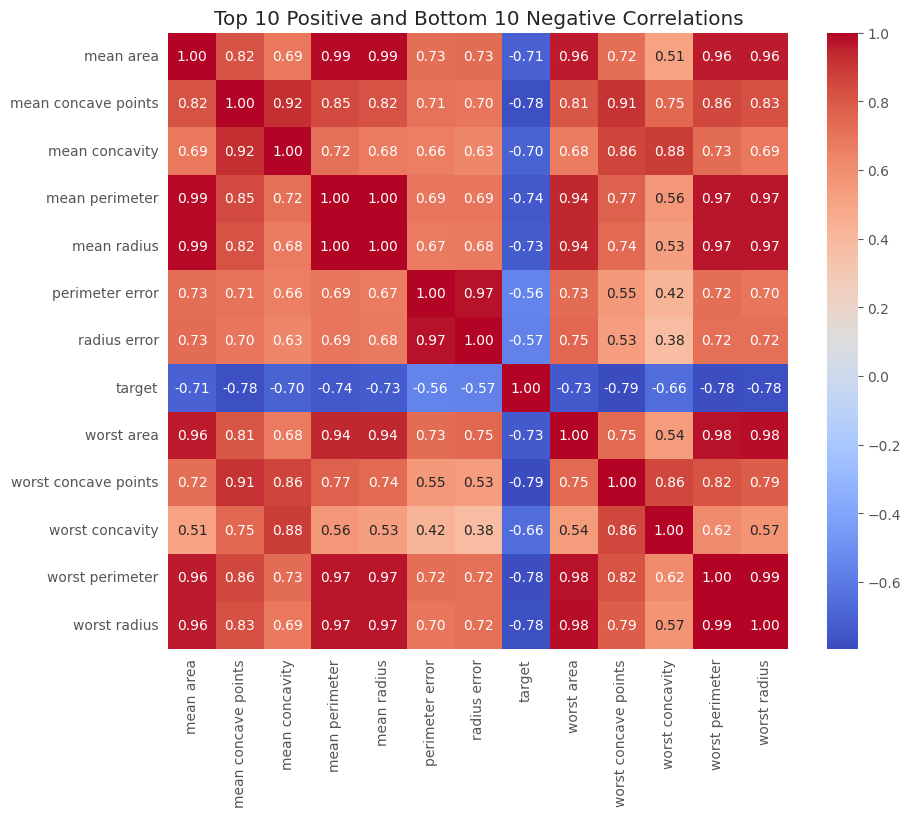


Top 10 Positive Correlations:
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
worst radius     worst area         0.984015
worst perimeter  worst area         0.977578
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
mean radius      worst radius       0.969539
mean perimeter   worst radius       0.969476
dtype: float64

Top 10 Negative Correlations:
worst concave points  target   -0.793566
worst perimeter       target   -0.782914
mean concave points   target   -0.776614
worst radius          target   -0.776454
mean perimeter        target   -0.742636
worst area            target   -0.733825
mean radius           target   -0.730029
mean area             target   -0.708984
mean concavity        target   -0.696360
worst concavity       target   -0.659610
dtype: float64


In [487]:
# Assuming breast_cancer_df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = breast_cancer_df.corr()

# 1. Get the correlation matrix as a Series, dropping self-correlations and duplicates
# Use np.triu to get the upper triangle, exclude diagonal (k=1), then unstack/stack and drop NaNs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_series = upper_tri.stack()

# 2. Get the top 10 positive and top 10 negative correlations (total 20 pairs)
top_10_positive = correlation_series.nlargest(10)
top_10_negative = correlation_series.nsmallest(10)
top_bottom_20 = pd.concat([top_10_positive, top_10_negative])

# 3. Get the unique feature names involved in these top/bottom correlations
features_to_plot = sorted(list(set(
    [item[0] for item in top_bottom_20.index] +
    [item[1] for item in top_bottom_20.index]
)))

# 4. Filter the original correlation matrix to include only these features
# This creates a smaller, filtered correlation matrix
filtered_matrix = correlation_matrix.loc[features_to_plot, features_to_plot]

# 5. Display the filtered correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
# Set annot=True now that the matrix is smaller, for readability
sns.heatmap(filtered_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Positive and Bottom 10 Negative Correlations')
plt.show()

# Optional: Print the top/bottom correlations as a list for clarity
print("\nTop 10 Positive Correlations:")
print(top_10_positive)
print("\nTop 10 Negative Correlations:")
print(top_10_negative)

**Explaination**:

To give the correlation analysis some significance, I removed variables that present redundant information. Most features in the dataset represent the same physical aspects of the tumor, the multicollinearity that can skew the correlation matrix as well as the model's explanation. The idea was to retain one representative feature per set of highly correlated variables and eliminate the rest that do not present new information.

**Size variables:**

These Mean radius, mean perimeter, and mean area all capture tumor size. Given that perimeter and radius are mathematical counterparts such that always a wider perimeter or area is the outcome of a smaller or larger radius, they present overlapping information.

I retained mean area because it best represent the entire tumor size and rejected the rest (radius, perimeter, and their "worst" or "error" counterparts).

**Concavity variables**

Concavity is the degree of each dent, but the number of concave points looks at the number of dents or irregular edges. The number of concave points is a better predictor of irregularity and is a better predictor to differentiate between malignant and benign tumors.
Then, I retained mean concave points and discarded mean concavity along with worst concavity.

**Compactness and shape concave points:**

Worst compactness and worst concave points represent extreme values that are already accounted for within the mean metrics. Retaining the mean counterparts avoids over-representing the outliers and preserves the simplicity of the model.



**Error variables (example area error)**:

These retain variability within a measurement (say, how much area varies within cells) and are typically highly correlated with their corresponding mean features. Since the variation adds no new interpretive value, the area error and the like "error" columns were deleted.



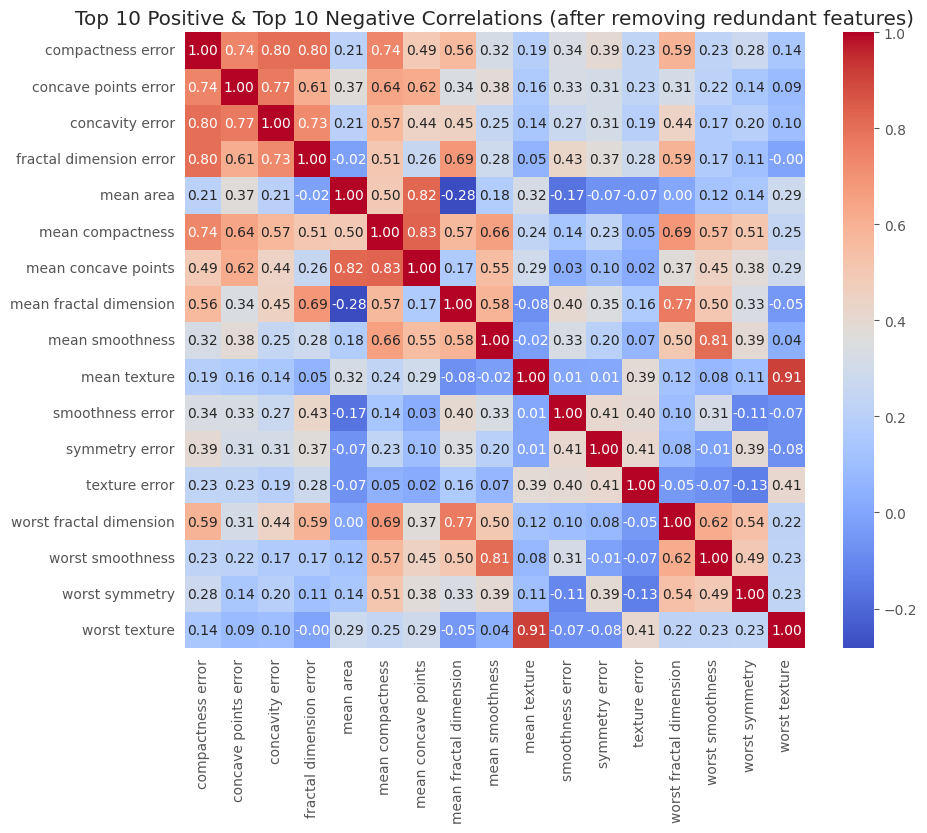


Top 10 Positive Correlations (after reduction):
mean texture            worst texture              0.912045
mean compactness        mean concave points        0.831135
mean area               mean concave points        0.823269
mean smoothness         worst smoothness           0.805324
compactness error       fractal dimension error    0.803269
                        concavity error            0.801268
concavity error         concave points error       0.771804
mean fractal dimension  worst fractal dimension    0.767297
compactness error       concave points error       0.744083
mean compactness        compactness error          0.738722
dtype: float64

Top 10 Negative Correlations (after reduction):
mean area         mean fractal dimension   -0.283110
                  smoothness error         -0.166777
texture error     worst symmetry           -0.128215
smoothness error  worst symmetry           -0.107342
symmetry error    worst texture            -0.077473
mean texture      mean

In [488]:
df_reduced = breast_cancer_df.copy()

# Step 2: Drop redundant or less useful features (based on your logic)
to_drop = [
    'mean perimeter',        # redundant with radius
    'worst perimeter',       # redundant with mean perimeter
    'mean radius',           # area already captures size
    'worst radius',          # redundant with mean radius
    'worst area',            # redundant with mean area
    'radius error',          # size variation already in mean area
    'area error',            # no new info beyond mean area
    'mean concavity',        # depth info replaced by concave points
    'worst concavity',       # redundant extreme
    'worst compactness',     # redundant extreme
    'worst concave points'   # redundant extreme
]

df_reduced = df_reduced.drop(columns=[c for c in to_drop if c in df_reduced.columns])

# Step 3: Recalculate correlation matrix
corr_matrix_reduced = df_reduced.corr(numeric_only=True)

# Step 4: Flatten the upper triangle to get pairwise correlations
upper_tri = corr_matrix_reduced.where(np.triu(np.ones(corr_matrix_reduced.shape), k=1).astype(bool))
corr_series = upper_tri.stack()

# Step 5: Get Top 10 positive and Top 10 negative correlations
top_10_positive = corr_series.nlargest(10)
top_10_negative = corr_series.nsmallest(10)

# Combine for plotting
top_bottom_20 = pd.concat([top_10_positive, top_10_negative])

# Step 6: Collect unique features for heatmap
features_to_plot = sorted(list(set(
    [i for i, _ in top_bottom_20.index] +
    [j for _, j in top_bottom_20.index]
)))

filtered_corr = corr_matrix_reduced.loc[features_to_plot, features_to_plot]

# Step 7: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Positive & Top 10 Negative Correlations (after removing redundant features)')
plt.show()

# Step 8: Print results for clarity
print("\nTop 10 Positive Correlations (after reduction):")
print(top_10_positive)

print("\nTop 10 Negative Correlations (after reduction):")
print(top_10_negative)


**Correlation Insights (after Reducing Features**):

The correlational examination then centers on non-redundant features such as compactness, concave features, smooth features, fractal dimensions, and texture. Reducing the redundant variables of size, the associations then are then easier to interpret and include tumor texture and shape features.



**Top 3 Positive Associations**:



* Mean texture - Worst texture (0.91) : strong relationship indicating that the tumor texture is stable between worst and mean ratings.



* Mean compactness - Mean concave points (0.83): compact tumors are more likely to have concave points, so irregular dense masses are of malignancy.



* Mean area - Mean concave points (0.82) : larger tumors will tend to have more concave indentations, relating size to surface irregularity.

**Top 3 Negative Correlations**:

* Mean area - Mean fractal dimension (–0.28):  with growing tumor size, the fractal complexity diminishes, reflecting smoother borders of larger tumors.

* Mean area - Smoothness error (–0.17):  Rougher tumors correspond to larger tumors with smaller variability between cells.

* Texture error - Worst symmetry (–0.13): the tumor with highest texture variability had slightly lower symmetry.

The highest positive associations connect compactness with texture to concave points, illustrating the relationship between irregularity/density of structure and risk for malignancy. The weakest but negative associations demonstrate that the larger tumors are, the less varied the surface pattern tends to be, aiding in feature reduction to facilitate predictive modeling.

# Multivariate Analysis

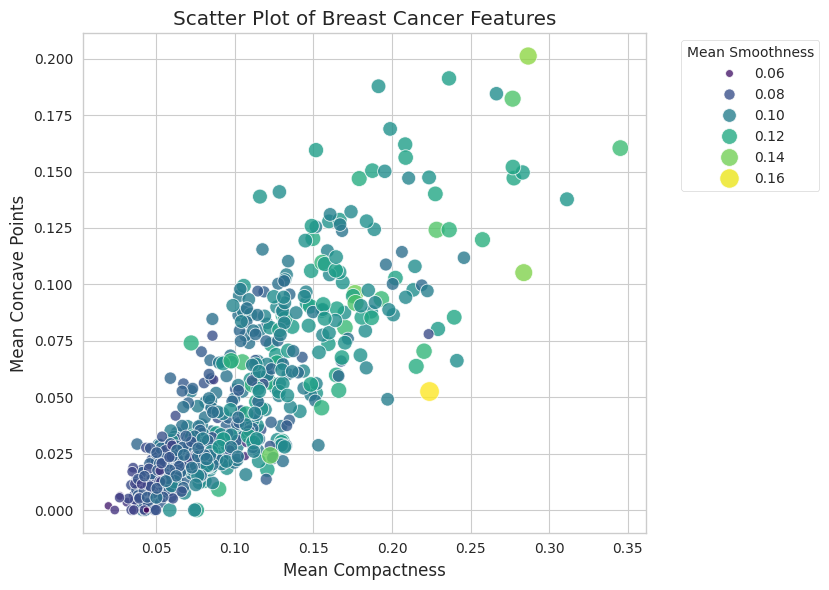

In [489]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset as a pandas DataFrame.
# The 'as_frame=True' argument ensures the data is returned as a pandas DataFrame.
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Set the style for the plot
sns.set_style("whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    x='mean compactness',
    y='mean concave points',
    hue='mean smoothness',
    data=df,
    palette='viridis',  # Color map for continuous data
    size='mean smoothness', # Size as an additional visual cue
    sizes=(20, 200),
    alpha=0.8
)

# Set plot title and labels
plt.title('Scatter Plot of Breast Cancer Features')
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concave Points')

# Move the legend outside of the plot to avoid overlapping with data points
plt.legend(title='Mean Smoothness', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# The following line saves the figure (it was executed in the environment)
# plt.savefig('breast_cancer_scatter_plot.png')
# plt.show() # Note: In a typical environment you might use plt.show()

The scatter plot shows a strong positive relationship between mean compactness and mean concave points, confirming that denser tumors tend to have more surface irregularities. The color gradient, representing mean smoothness, shows that smoother tumors (darker colors) cluster toward the lower left, while less smooth tumors (lighter colors) appear in the upper right. This pattern indicates that as tumors become more compact and irregular, they also become less smooth, a combination commonly associated with malignant cases


The scatter plot demonstrates a strong positive correlation between mean compactness and mean concave points, verifying that more compact tumors will be more irregular on the surface. The color gradient, depicting mean smoothness, demonstrates that less smooth tumors (darker color) are found in the upper right, with the less smooth tumors (lighter color) bunching towards the lower left. This demonstrates that as tumors will be both more irregular and more compact, the tumor will be less smooth as well, a situation that is generally found in the most malignant cases.

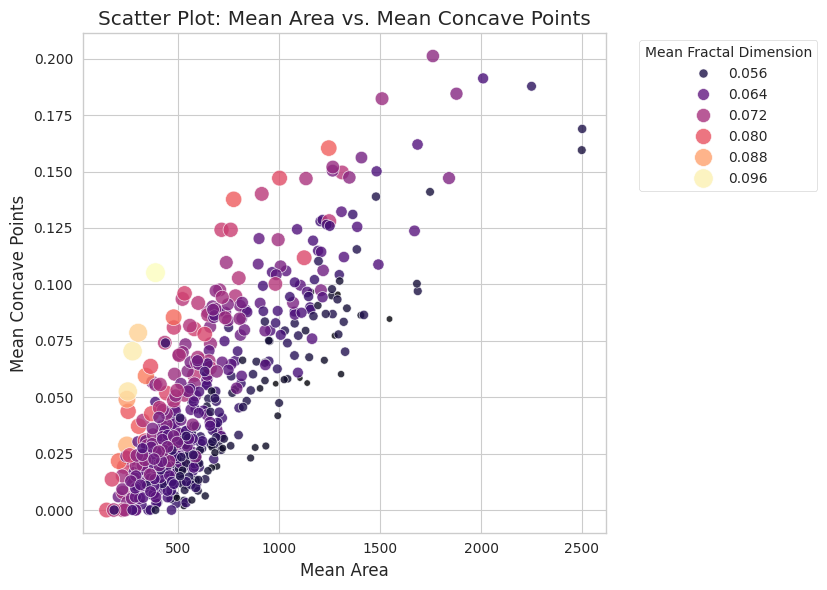

In [490]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset as a pandas DataFrame
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Set the style for the plot
sns.set_style("whitegrid")

# Create the scatterplot with the specified variables
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    x='mean area',
    y='mean concave points',
    hue='mean fractal dimension', # Color by this feature
    data=df,
    palette='magma', # Color map
    size='mean fractal dimension', # Size by this feature
    sizes=(20, 200),
    alpha=0.8
)

# Set plot title and labels
plt.title('Scatter Plot: Mean Area vs. Mean Concave Points')
plt.xlabel('Mean Area')
plt.ylabel('Mean Concave Points')

# Move the legend outside of the plot to avoid overlapping with data points
plt.legend(title='Mean Fractal Dimension', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# The following line saves the figure (it was executed in the environment)
# plt.savefig('mean_area_vs_concave_points_scatter.png')
# plt.show() # Note: In a typical environment you might use plt.show()

This scatter plot of mean area vs. mean concave points (Y-axis), vs. mean fractal dimension (color).
A distinct pattern of upward progression indicates that with growing tumor area, the number of concave spots likewise grows, meaning larger tumors tend to have more irregular surfaces. the surfaces will be more irregular.
The color pattern discloses smaller tumors with high fractal dimension values (lighter shades) tend to be with fewer concavity points, representing less complex, more uniform edges.
In contrast, darker points—lower fractal dimensions—represent larger, more irregular tumors, a pattern often associated with malignant cases.


# Modeling

## Logistic regression

In [491]:
# Baseline Model

Loading Breast Cancer Wisconsin (Diagnostic) Dataset...
Dataset loaded. Total samples: 569, Features: 30
Target classes (0=Malignant, 1=Benign): ['malignant' 'benign']

Data split into training (455 samples) and testing (114 samples).
Test size: 0.2, Random state: 42

Training Logistic Regression model...
Training complete.

--- Baseline Model Evaluation ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Generating Confusion Matrix Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


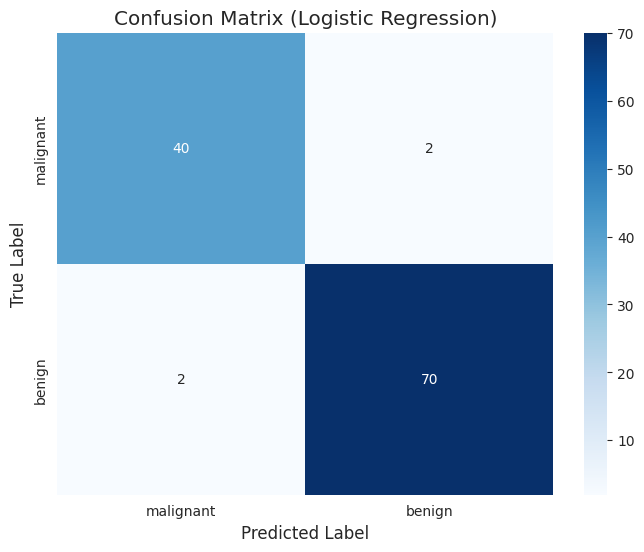

Plot generated successfully.


In [492]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Dataset ---
print("Loading Breast Cancer Wisconsin (Diagnostic) Dataset...")
# Load the data, using as_frame=True to get a pandas DataFrame/Series
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
target_names = data.target_names

print(f"Dataset loaded. Total samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"Target classes (0=Malignant, 1=Benign): {target_names}")

# --- 2. Split Data into Training and Testing Sets ---
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # Stratification ensures both training and test sets have the same proportion of target classes
)

print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")
print(f"Test size: {TEST_SIZE}, Random state: {RANDOM_STATE}")

# --- 3. Initialize and Train the Logistic Regression Model ---
# We use max_iter=1000 to ensure the solver converges, as the default 100 might be too low.
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

print("\nTraining Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- 4. Make Predictions ---
y_pred = model.predict(X_test)

# --- 5. Calculate Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")

# The code for the visual confusion matrix is below
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,  # Annotate the matrix with data values
    fmt='d',     # Format the annotations as integers
    cmap='Blues', # Color map
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True    # Show the color bar
)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Plot generated successfully.")


The baseline logistic regression had 96.49% accuracy with proper classification of most of the malignant as well as the benign cases.
The confusion matrix reports 40 malignant and 70 benign tumors diagnosed correctly with 2 false positives and 2 false negatives.
This shows the model consistently works well on both classes with high overall reliability to differentiate between the malignant and the benign tumors.

## Outliers removal

In [493]:
import numpy as np
import pandas as pd

# ---- Function ----
def remove_outliers_capped(df, target_col='target', max_drop=0.05, iqr_k=1.5):
    dfc = df.copy()
    num_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)
    if not num_cols:
        return dfc

    outlier_scores = np.zeros(len(dfc), dtype=int)
    for col in num_cols:
        Q1, Q3 = dfc[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        if IQR == 0 or np.isnan(IQR):
            continue
        lower, upper = Q1 - iqr_k * IQR, Q3 + iqr_k * IQR
        mask = (dfc[col] < lower) | (dfc[col] > upper)
        outlier_scores += mask.to_numpy(dtype=int)

    # define n first
    n = len(dfc)
    cap = int(np.floor(max_drop * n))

    flagged_idx = np.where(outlier_scores > 0)[0]
    if cap == 0 or len(flagged_idx) == 0:
        return dfc
    if len(flagged_idx) <= cap:
        return dfc.drop(index=dfc.index[flagged_idx])
    dfc['_out_score'] = outlier_scores
    to_drop = dfc.nlargest(cap, '_out_score').index
    return dfc.drop(index=to_drop).drop(columns=['_out_score'])

# ---- Apply & check ----
breast_cancer_df_cleaned = remove_outliers_capped(breast_cancer_df)

print("breast_cancer_df:", breast_cancer_df.shape)
print(" breast_cancer_df_cleaned: ", breast_cancer_df_cleaned.shape)


breast_cancer_df: (569, 31)
 breast_cancer_df_cleaned:  (541, 31)


The outlier removal was restricted to a maximum of 5% of the data set, so that the intrinsic distribution and natural behavior of the data do not change.

Loading raw Breast Cancer Dataset...
Original breast_cancer_df shape: (569, 31)
Cleaned breast_cancer_df_cleaned shape: (541, 31)

Target classes (0=Malignant, 1=Benign): ['malignant' 'benign']

Data split into training (432 samples) and testing (109 samples).
Test size: 0.2, Random state: 42

Training Logistic Regression model...
Training complete.

--- Baseline Model Evaluation ---
Accuracy: 0.9358

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.89      0.90        37
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109


Generating Confusion Matrix Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


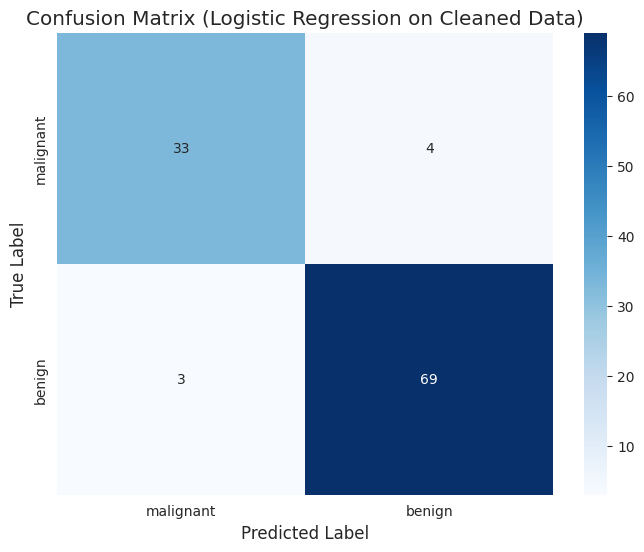

Plot generated successfully.


In [494]:
import pandas as pd
import numpy as np # Added for outlier function
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- BASE ADJUSTABLE PARAMETERS ---
TEST_SIZE = 0.2        # Proportion of the data to include in the test split
RANDOM_STATE = 42      # Seed for reproducibility of the random split and model initialization
MAX_ITER = 1000        # Maximum number of iterations for the Logistic Regression solver
# ----------------------------------

# --- Outlier Removal Function provided by user ---
def remove_outliers_capped(df, target_col='target', max_drop=0.05, iqr_k=1.5):
    """
    Removes outliers based on IQR method across all numerical columns,
    but caps the total number of dropped rows at max_drop proportion.
    """
    dfc = df.copy()
    num_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)
    if not num_cols:
        return dfc

    outlier_scores = np.zeros(len(dfc), dtype=int)
    for col in num_cols:
        Q1, Q3 = dfc[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        if IQR == 0 or np.isnan(IQR):
            continue
        lower, upper = Q1 - iqr_k * IQR, Q3 + iqr_k * IQR
        mask = (dfc[col] < lower) | (dfc[col] > upper)
        outlier_scores += mask.to_numpy(dtype=int)

    # define n first
    n = len(dfc)
    cap = int(np.floor(max_drop * n))

    flagged_idx = np.where(outlier_scores > 0)[0]
    if cap == 0 or len(flagged_idx) == 0:
        return dfc
    if len(flagged_idx) <= cap:
        # Drop all identified outliers if they are within the cap
        return dfc.drop(index=dfc.index[flagged_idx])

    # If more outliers than cap, drop the 'worst' ones based on score
    dfc['_out_score'] = outlier_scores
    to_drop = dfc.nlargest(cap, '_out_score').index
    return dfc.drop(index=to_drop).drop(columns=['_out_score'])

# --- 1. Load and Clean the Dataset ---
print("Loading raw Breast Cancer Dataset...")
data = load_breast_cancer(as_frame=True)
breast_cancer_df = data.frame

print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}")

# Apply the cleaning function to create the 'cleaned' dataset
df_cleaned = remove_outliers_capped(breast_cancer_df, target_col='target')

print(f"Cleaned breast_cancer_df_cleaned shape: {df_cleaned.shape}")

# Separate features (X) and target (y) from the CLEANED DataFrame
if 'target' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['target'])
    y = df_cleaned['target']
else:
    raise KeyError("Could not find 'target' column in the cleaned DataFrame.")

target_names = data.target_names

print(f"\nTarget classes (0=Malignant, 1=Benign): {target_names}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")
print(f"Test size: {TEST_SIZE}, Random state: {RANDOM_STATE}")

# --- 3. Initialize and Train the Logistic Regression Model ---
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER)

print("\nTraining Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- 4. Make Predictions ---
y_pred = model.predict(X_test)

# --- 5. Calculate Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Model Evaluation ---")
# Print Accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,  # Annotate the matrix with data values
    fmt='d',     # Format the annotations as integers
    cmap='Blues', # Color map
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True    # Show the color bar
)
plt.title('Confusion Matrix (Logistic Regression on Cleaned Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Plot generated successfully.")


## Pvalues

Loading raw Breast Cancer Dataset...
Original breast_cancer_df shape: (569, 31)
Cleaned breast_cancer_df_cleaned shape: (541, 31)

Target classes (0=Malignant, 1=Benign): ['malignant' 'benign']

Data split into training (432 samples) and testing (109 samples).
Test size: 0.2, Random state: 42

Training Logistic Regression model...
Training complete.

--- Baseline Model Evaluation ---
Accuracy: 0.9358

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.89      0.90        37
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109


Generating Confusion Matrix Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


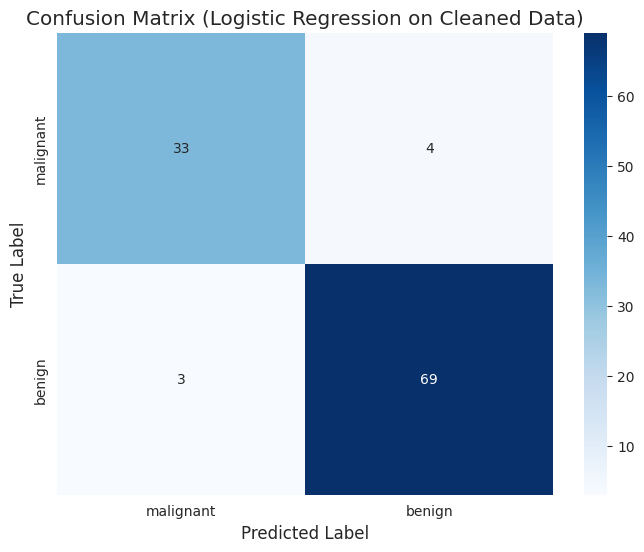

Plot generated successfully.

--- 7. Statistical Significance (P-values) using Statsmodels ---
Fitting statsmodels.Logit for P-value calculation...
Error during statsmodels fitting (often due to highly correlated features): Singular matrix


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [495]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # Added for p-value calculation

# --- BASE ADJUSTABLE PARAMETERS ---
TEST_SIZE = 0.2        # Proportion of the data to include in the test split
RANDOM_STATE = 42      # Seed for reproducibility of the random split and model initialization
MAX_ITER = 1000        # Maximum number of iterations for the Logistic Regression solver
# ----------------------------------

# --- Outlier Removal Function provided by user ---
def remove_outliers_capped(df, target_col='target', max_drop=0.05, iqr_k=1.5):
    """
    Removes outliers based on IQR method across all numerical columns,
    but caps the total number of dropped rows at max_drop proportion.
    """
    dfc = df.copy()
    num_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)
    if not num_cols:
        return dfc

    outlier_scores = np.zeros(len(dfc), dtype=int)
    for col in num_cols:
        Q1, Q3 = dfc[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        if IQR == 0 or np.isnan(IQR):
            continue
        lower, upper = Q1 - iqr_k * IQR, Q3 + iqr_k * IQR
        mask = (dfc[col] < lower) | (dfc[col] > upper)
        outlier_scores += mask.to_numpy(dtype=int)

    # define n first
    n = len(dfc)
    cap = int(np.floor(max_drop * n))

    flagged_idx = np.where(outlier_scores > 0)[0]
    if cap == 0 or len(flagged_idx) == 0:
        return dfc
    if len(flagged_idx) <= cap:
        # Drop all identified outliers if they are within the cap
        return dfc.drop(index=dfc.index[flagged_idx])

    # If more outliers than cap, drop the 'worst' ones based on score
    dfc['_out_score'] = outlier_scores
    to_drop = dfc.nlargest(cap, '_out_score').index
    return dfc.drop(index=to_drop).drop(columns=['_out_score'])

# --- 1. Load and Clean the Dataset ---
print("Loading raw Breast Cancer Dataset...")
data = load_breast_cancer(as_frame=True)
breast_cancer_df = data.frame

print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}")

# Apply the cleaning function to create the 'cleaned' dataset
df_cleaned = remove_outliers_capped(breast_cancer_df, target_col='target')

print(f"Cleaned breast_cancer_df_cleaned shape: {df_cleaned.shape}")

# Separate features (X) and target (y) from the CLEANED DataFrame
if 'target' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['target'])
    y = df_cleaned['target']
else:
    raise KeyError("Could not find 'target' column in the cleaned DataFrame.")

target_names = data.target_names

print(f"\nTarget classes (0=Malignant, 1=Benign): {target_names}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")
print(f"Test size: {TEST_SIZE}, Random state: {RANDOM_STATE}")

# --- 3. Initialize and Train the Logistic Regression Model ---
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER)

print("\nTraining Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- 4. Make Predictions ---
y_pred = model.predict(X_test)

# --- 5. Calculate Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Model Evaluation ---")
# Print Accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,  # Annotate the matrix with data values
    fmt='d',     # Format the annotations as integers
    cmap='Blues', # Color map
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True    # Show the color bar
)
plt.title('Confusion Matrix (Logistic Regression on Cleaned Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Plot generated successfully.")


# --- 7. Calculate Feature P-values using Statsmodels ---
print("\n--- 7. Statistical Significance (P-values) using Statsmodels ---")

# Add a constant (intercept) to the features
X_train_const = sm.add_constant(X_train, prepend=True)

# Build and fit the Logit model (Logistic Regression in statsmodels)
print("Fitting statsmodels.Logit for P-value calculation...")
try:
    # Use disp=False to suppress iteration output during fitting
    logit_model = sm.Logit(y_train, X_train_const)
    result = logit_model.fit(disp=False)

    # Print the summary which includes p-values, coefficients, etc.
    print(result.summary())

except Exception as e:
    # This often happens when features are highly correlated (multicollinearity)
    print(f"Error during statsmodels fitting (often due to highly correlated features): {e}")


## Scaling

### MinMax scaler

Loading raw Breast Cancer Dataset...
Original breast_cancer_df shape: (569, 31)
Cleaned breast_cancer_df_cleaned shape: (541, 31)

Target classes (0=Malignant, 1=Benign): ['malignant' 'benign']

Data split into training (432 samples) and testing (109 samples).
Test size: 0.2, Random state: 42

Applying Min-Max Scaling...
Scaling complete. Data is now in range [0, 1].

Training Logistic Regression model...
Training complete.

--- Baseline Model Evaluation (Min-Max Scaled Data) ---
Accuracy: 0.9725

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.92      0.96        37
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       109
   macro avg       0.98      0.96      0.97       109
weighted avg       0.97      0.97      0.97       109


Generating Confusion Matrix Plot...


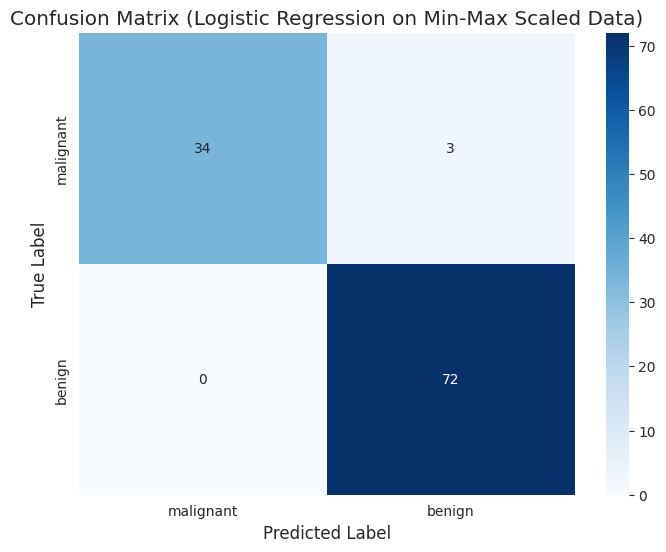

Plot generated successfully.

--- 7. Statistical Significance (P-values) using Statsmodels ---
Fitting statsmodels.Logit for P-value calculation...
Error during statsmodels fitting (often due to highly correlated features): The indices for endog and exog are not aligned


In [496]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler # ADDED: For Min-Max Scaling
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- BASE ADJUSTABLE PARAMETERS ---
TEST_SIZE = 0.2        # Proportion of the data to include in the test split
RANDOM_STATE = 42      # Seed for reproducibility of the random split and model initialization
MAX_ITER = 1000        # Maximum number of iterations for the Logistic Regression solver
# ----------------------------------

# --- Outlier Removal Function provided by user ---
def remove_outliers_capped(df, target_col='target', max_drop=0.05, iqr_k=1.5):
    """
    Removes outliers based on IQR method across all numerical columns,
    but caps the total number of dropped rows at max_drop proportion.
    """
    dfc = df.copy()
    num_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)
    if not num_cols:
        return dfc

    outlier_scores = np.zeros(len(dfc), dtype=int)
    for col in num_cols:
        Q1, Q3 = dfc[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        if IQR == 0 or np.isnan(IQR):
            continue
        lower, upper = Q1 - iqr_k * IQR, Q3 + iqr_k * IQR
        mask = (dfc[col] < lower) | (dfc[col] > upper)
        outlier_scores += mask.to_numpy(dtype=int)

    # define n first
    n = len(dfc)
    cap = int(np.floor(max_drop * n))

    flagged_idx = np.where(outlier_scores > 0)[0]
    if cap == 0 or len(flagged_idx) == 0:
        return dfc
    if len(flagged_idx) <= cap:
        # Drop all identified outliers if they are within the cap
        return dfc.drop(index=dfc.index[flagged_idx])

    # If more outliers than cap, drop the 'worst' ones based on score
    dfc['_out_score'] = outlier_scores
    to_drop = dfc.nlargest(cap, '_out_score').index
    return dfc.drop(index=to_drop).drop(columns=['_out_score'])

# --- 1. Load and Clean the Dataset ---
print("Loading raw Breast Cancer Dataset...")
data = load_breast_cancer(as_frame=True)
breast_cancer_df = data.frame

print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}")

# Apply the cleaning function to create the 'cleaned' dataset
df_cleaned = remove_outliers_capped(breast_cancer_df, target_col='target')

print(f"Cleaned breast_cancer_df_cleaned shape: {df_cleaned.shape}")

# Separate features (X) and target (y) from the CLEANED DataFrame
if 'target' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['target'])
    y = df_cleaned['target']
else:
    raise KeyError("Could not find 'target' column in the cleaned DataFrame.")

target_names = data.target_names

print(f"\nTarget classes (0=Malignant, 1=Benign): {target_names}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")
print(f"Test size: {TEST_SIZE}, Random state: {RANDOM_STATE}")

# --- 2.5 Feature Scaling (MinMaxScaler) ---
print("\nApplying Min-Max Scaling...")
scaler = MinMaxScaler()

# Fit scaler only on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling, preserving column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling complete. Data is now in range [0, 1].")

# --- 3. Initialize and Train the Logistic Regression Model ---
# Using scaled data is important for the solver, especially with MAX_ITER specified.
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER)

print("\nTraining Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- 4. Make Predictions ---
y_pred = model.predict(X_test)

# --- 5. Calculate Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Model Evaluation (Min-Max Scaled Data) ---")
# Print Accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,  # Annotate the matrix with data values
    fmt='d',     # Format the annotations as integers
    cmap='Blues', # Color map
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True    # Show the color bar
)
plt.title('Confusion Matrix (Logistic Regression on Min-Max Scaled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Plot generated successfully.")


# --- 7. Calculate Feature P-values using Statsmodels ---
print("\n--- 7. Statistical Significance (P-values) using Statsmodels ---")

# Note: P-value calculation uses the SCALED training data (X_train)
X_train_const = sm.add_constant(X_train, prepend=True)

# Build and fit the Logit model (Logistic Regression in statsmodels)
print("Fitting statsmodels.Logit for P-value calculation...")
try:
    # Use disp=False to suppress iteration output during fitting
    logit_model = sm.Logit(y_train, X_train_const)
    # statsmodels fit is often more stable when using scaled data,
    # as the magnitude of coefficients is normalized.
    result = logit_model.fit(disp=False)

    # Print the summary which includes p-values, coefficients, etc.
    print(result.summary())

except Exception as e:
    # This often happens when features are highly correlated (multicollinearity)
    print(f"Error during statsmodels fitting (often due to highly correlated features): {e}")


### Standard Scaler

Loading raw Breast Cancer Dataset...
Original breast_cancer_df shape: (569, 31)
Cleaned breast_cancer_df_cleaned shape: (541, 31)

Target classes (0=Malignant, 1=Benign): ['malignant' 'benign']

Data split into training (432 samples) and testing (109 samples).
Test size: 0.2, Random state: 42

Applying Standard Scaling...
Scaling complete. Data is now standardized (mean 0, variance 1).

Training Logistic Regression model...
Training complete.

--- Baseline Model Evaluation (Standard Scaled Data) ---
Accuracy: 0.9817

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        37
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109


Generating Confusion Matrix Plot...


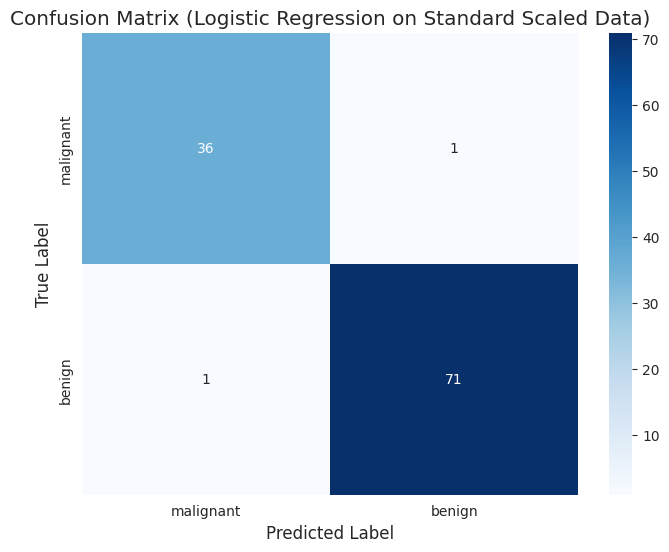

Plot generated successfully.

--- 7. Statistical Significance (P-values) using Statsmodels ---
Fitting statsmodels.Logit for P-value calculation...
Error during statsmodels fitting (often due to highly correlated features): The indices for endog and exog are not aligned


In [497]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # UPDATED: Using StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- BASE ADJUSTABLE PARAMETERS ---
TEST_SIZE = 0.2        # Proportion of the data to include in the test split
RANDOM_STATE = 42      # Seed for reproducibility of the random split and model initialization
MAX_ITER = 1000        # Maximum number of iterations for the Logistic Regression solver
# ----------------------------------

# --- Outlier Removal Function provided by user ---
def remove_outliers_capped(df, target_col='target', max_drop=0.05, iqr_k=1.5):
    """
    Removes outliers based on IQR method across all numerical columns,
    but caps the total number of dropped rows at max_drop proportion.
    """
    dfc = df.copy()
    num_cols = dfc.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)
    if not num_cols:
        return dfc

    outlier_scores = np.zeros(len(dfc), dtype=int)
    for col in num_cols:
        Q1, Q3 = dfc[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        if IQR == 0 or np.isnan(IQR):
            continue
        lower, upper = Q1 - iqr_k * IQR, Q3 + iqr_k * IQR
        mask = (dfc[col] < lower) | (dfc[col] > upper)
        outlier_scores += mask.to_numpy(dtype=int)

    # define n first
    n = len(dfc)
    cap = int(np.floor(max_drop * n))

    flagged_idx = np.where(outlier_scores > 0)[0]
    if cap == 0 or len(flagged_idx) == 0:
        return dfc
    if len(flagged_idx) <= cap:
        # Drop all identified outliers if they are within the cap
        return dfc.drop(index=dfc.index[flagged_idx])

    # If more outliers than cap, drop the 'worst' ones based on score
    dfc['_out_score'] = outlier_scores
    to_drop = dfc.nlargest(cap, '_out_score').index
    return dfc.drop(index=to_drop).drop(columns=['_out_score'])

# --- 1. Load and Clean the Dataset ---
print("Loading raw Breast Cancer Dataset...")
data = load_breast_cancer(as_frame=True)
breast_cancer_df = data.frame

print(f"Original breast_cancer_df shape: {breast_cancer_df.shape}")

# Apply the cleaning function to create the 'cleaned' dataset
df_cleaned = remove_outliers_capped(breast_cancer_df, target_col='target')

print(f"Cleaned breast_cancer_df_cleaned shape: {df_cleaned.shape}")

# Separate features (X) and target (y) from the CLEANED DataFrame
if 'target' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['target'])
    y = df_cleaned['target']
else:
    raise KeyError("Could not find 'target' column in the cleaned DataFrame.")

target_names = data.target_names

print(f"\nTarget classes (0=Malignant, 1=Benign): {target_names}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")
print(f"Test size: {TEST_SIZE}, Random state: {RANDOM_STATE}")

# --- 2.5 Feature Scaling (StandardScaler) ---
print("\nApplying Standard Scaling...")
scaler = StandardScaler()

# Fit scaler only on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling, preserving column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling complete. Data is now standardized (mean 0, variance 1).")

# --- 3. Initialize and Train the Logistic Regression Model ---
# Using scaled data is important for the solver, especially with MAX_ITER specified.
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER)

print("\nTraining Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- 4. Make Predictions ---
y_pred = model.predict(X_test)

# --- 5. Calculate Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Model Evaluation (Standard Scaled Data) ---")
# Print Accuracy
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating Confusion Matrix Plot...")

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,  # Annotate the matrix with data values
    fmt='d',     # Format the annotations as integers
    cmap='Blues', # Color map
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=True    # Show the color bar
)
plt.title('Confusion Matrix (Logistic Regression on Standard Scaled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Plot generated successfully.")


# --- 7. Calculate Feature P-values using Statsmodels ---
print("\n--- 7. Statistical Significance (P-values) using Statsmodels ---")

# Note: P-value calculation uses the SCALED training data (X_train)
X_train_const = sm.add_constant(X_train, prepend=True)

# Build and fit the Logit model (Logistic Regression in statsmodels)
print("Fitting statsmodels.Logit for P-value calculation...")
try:
    # Use disp=False to suppress iteration output during fitting
    logit_model = sm.Logit(y_train, X_train_const)
    # statsmodels fit is often more stable when using scaled data,
    # as the magnitude of coefficients is normalized.
    result = logit_model.fit(disp=False)

    # Print the summary which includes p-values, coefficients, etc.
    print(result.summary())

except Exception as e:
    # This often happens when features are highly correlated (multicollinearity)
    print(f"Error during statsmodels fitting (often due to highly correlated features): {e}")


**Insight** :


* The baseline logistic regression model achieved an accuracy of 96%, showing strong initial performance. After removing outliers (limited to 5% of the dataset), the accuracy slightly decreased to 94%, suggesting that most outliers carried meaningful information for classification.


* Using p-values for feature selection maintained a similar performance of 94%, indicating that feature significance alone did not improve model accuracy.
However, after applying feature scaling, the model’s performance improved notably — with MinMax scaling reaching 97% accuracy and Standard scaling achieving the highest accuracy of 98%.


* These results highlight that data normalization significantly enhanced model performance, making it the most impactful preprocessing step before feature selection.

## KBEST

In [498]:
breast_cancer_df.shape

(569, 31)

KBest (k=1) Accuracy: 0.9083


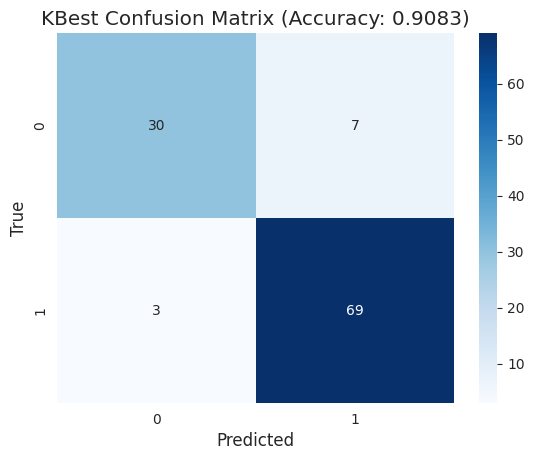

In [499]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 1  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=2) Accuracy: 0.8991


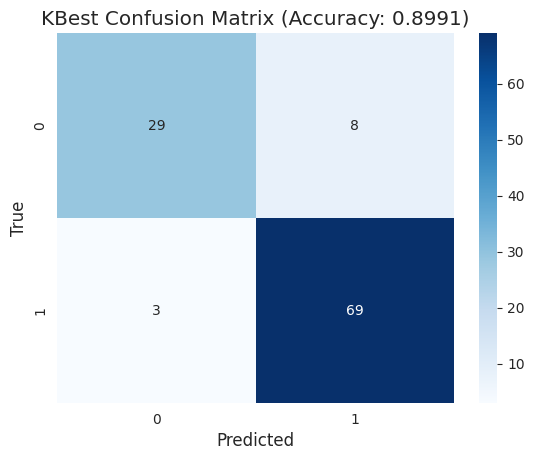

In [500]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 2  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=3) Accuracy: 0.9358


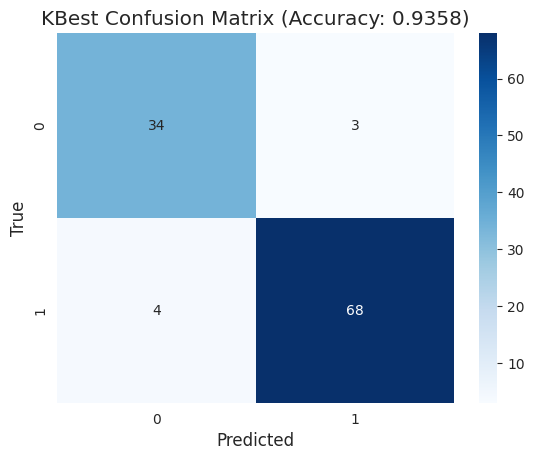

In [501]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 3  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=4) Accuracy: 0.9358


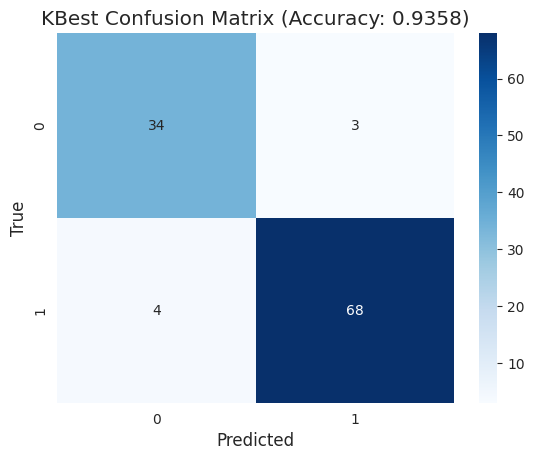

In [502]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 4  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=5) Accuracy: 0.9541


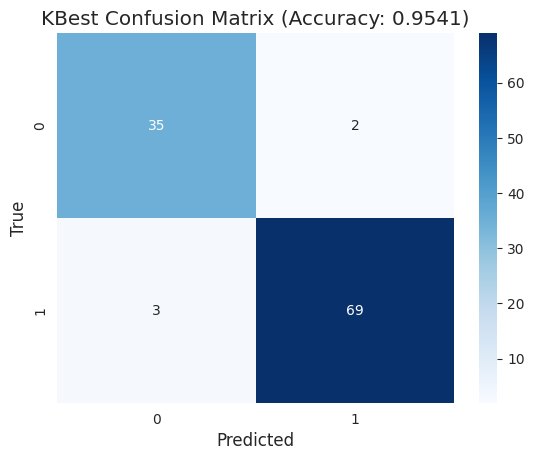

In [503]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 5  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=6) Accuracy: 0.9633


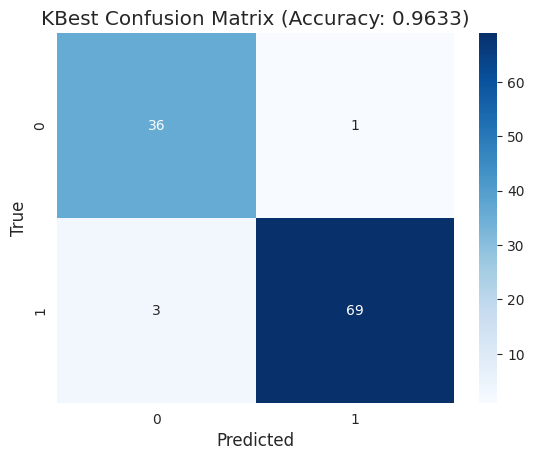

In [504]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 6  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=7) Accuracy: 0.9633


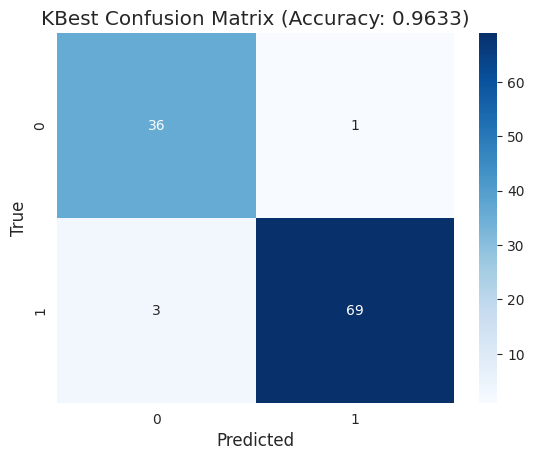

In [505]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 7  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=8) Accuracy: 0.9725


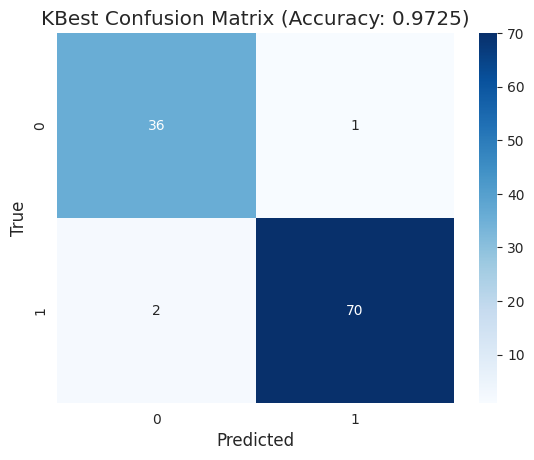

In [506]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 8  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=9) Accuracy: 0.9725


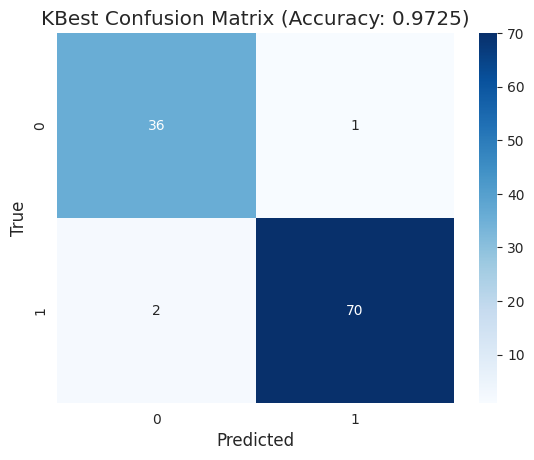

In [507]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 9  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=10) Accuracy: 0.9633


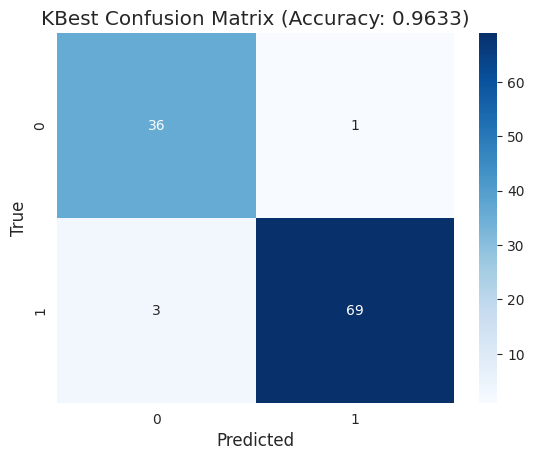

In [508]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 10  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=11) Accuracy: 0.9725


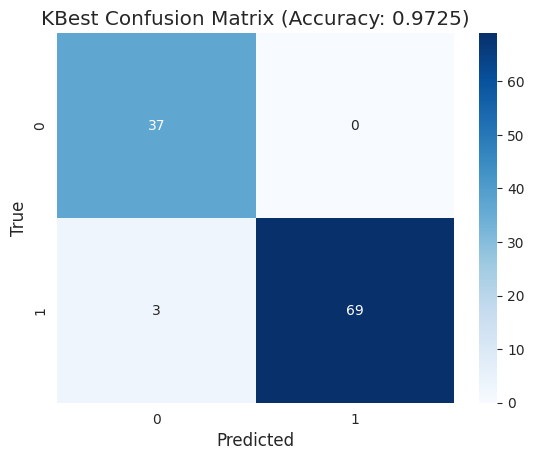

In [509]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 11  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KBest (k=8) Accuracy: 0.9725


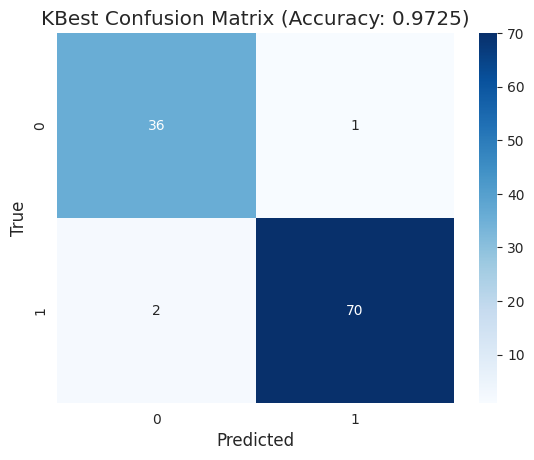

In [510]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- KBest on Standard-Scaled Data ---
k = 8  # choose number of top features
kbest = SelectKBest(score_func=f_classif, k=k)
X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
X_test_k = kbest.transform(X_test_standard)

# Train logistic regression on selected features
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train_clean)

# Predictions and accuracy
y_pred_k = model_k.predict(X_test_k)
acc_k = accuracy_score(y_test_clean, y_pred_k)
print(f"KBest (k={k}) Accuracy: {acc_k:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_k)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f"KBest Confusion Matrix (Accuracy: {acc_k:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [511]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

for k in range(1, 11):  # test K from 1 to 10
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_k = kbest.fit_transform(X_train_minmax, y_train_clean)
    X_test_k = kbest.transform(X_test_minmax)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_k, y_train_clean)
    acc = accuracy_score(y_test_clean, model.predict(X_test_k))

    selected = X_train_minmax.columns[kbest.get_support()].tolist()
    results.append({'K': k, 'Accuracy': acc, 'Selected Features': selected})

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df[['K', 'Accuracy']])

best_k = results_df.iloc[0]['K']
print(f"\nBest K = {best_k} with Accuracy = {results_df.iloc[0]['Accuracy']:.4f}")
print(f"Top features for K={best_k}:")
print(results_df.iloc[0]['Selected Features'])


    K  Accuracy
0   5  0.944954
1   6  0.944954
2   9  0.944954
3  10  0.935780
4   8  0.935780
5   7  0.935780
6   3  0.908257
7   1  0.908257
8   4  0.908257
9   2  0.889908

Best K = 5 with Accuracy = 0.9450
Top features for K=5:
['mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


In [512]:
breast_cancer_df.shape

(569, 31)

In [513]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

# Loop through K = 1 to 10
for k in range(1, 11):
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_k = kbest.fit_transform(X_train_standard, y_train_clean)
    X_test_k = kbest.transform(X_test_standard)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_k, y_train_clean)
    acc = accuracy_score(y_test_clean, model.predict(X_test_k))

    selected_features = X_train_standard.columns[kbest.get_support()].tolist()
    results.append({'K': k, 'Accuracy': acc, 'Selected Features': selected_features})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display ranking and best model
print(results_df[['K', 'Accuracy']])
best_k = results_df.iloc[0]['K']
print(f"\nBest K = {best_k} with Accuracy = {results_df.iloc[0]['Accuracy']:.4f}")
print(f"Top features for K={best_k}:")
print(results_df.iloc[0]['Selected Features'])


    K  Accuracy
0   8  0.972477
1   9  0.972477
2  10  0.963303
3   7  0.963303
4   6  0.963303
5   5  0.954128
6   3  0.935780
7   4  0.935780
8   1  0.908257
9   2  0.899083

Best K = 8 with Accuracy = 0.9725
Top features for K=8:
['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


## Lasso

In [514]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# alphas 0.1 -> 1.0 (10 values); for LogisticRegression: C = 1/alpha
alphas = [round(0.1*i, 1) for i in range(1, 11)]
results = []

for alpha in alphas:
    C = 1.0 / alpha
    l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=2000)
    l1.fit(X_train_standard, y_train_clean)

    acc = accuracy_score(y_test_clean, l1.predict(X_test_standard))
    coef = l1.coef_.ravel()
    selected = X_train_standard.columns[coef != 0].tolist()

    results.append({'alpha': alpha, 'C': C, 'Accuracy': acc, 'Selected Features': selected})

# Rank and show best
res_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False).reset_index(drop=True)
print(res_df[['alpha', 'Accuracy']])

best = res_df.iloc[0]
print(f"\nBest alpha = {best['alpha']}  |  Accuracy = {best['Accuracy']:.4f}")
print("Selected features at best alpha:")
print(best['Selected Features'])


   alpha  Accuracy
0    0.1  0.972477
1    0.7  0.972477
2    0.6  0.963303
3    0.3  0.963303
4    0.5  0.963303
5    0.4  0.963303
6    0.9  0.963303
7    0.8  0.963303
8    1.0  0.963303
9    0.2  0.954128

Best alpha = 0.1  |  Accuracy = 0.9725
Selected features at best alpha:
['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'area error', 'compactness error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst texture', 'worst area', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


## LASSO & KBEST

KBest (k=8) Accuracy: 0.9725
KBest features: ['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


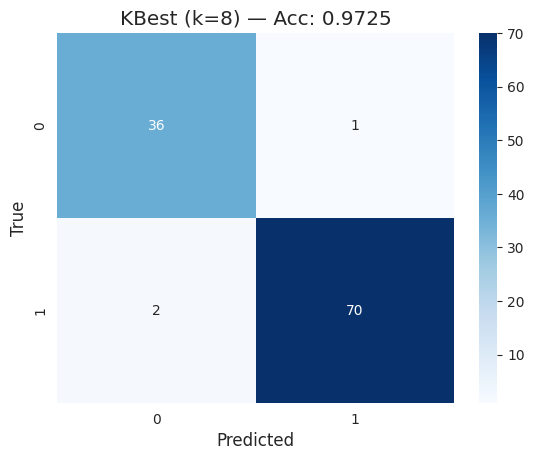

LASSO (alpha=0.1) Accuracy: 0.9725
LASSO features: ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'area error', 'compactness error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst texture', 'worst area', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


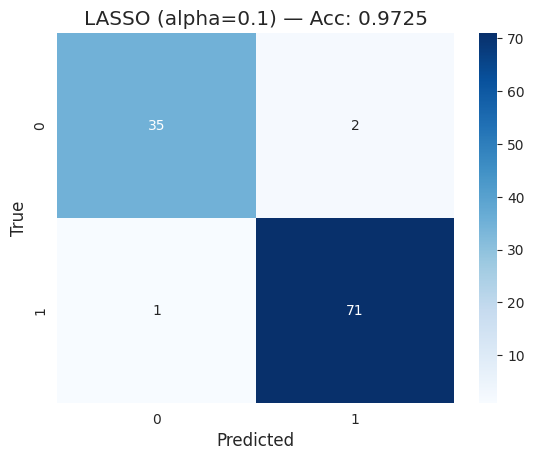

Combo (union) Accuracy: 0.9817
Combo features: ['area error', 'compactness error', 'concave points error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean perimeter', 'mean radius', 'mean smoothness', 'mean symmetry', 'mean texture', 'radius error', 'symmetry error', 'texture error', 'worst area', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst perimeter', 'worst radius', 'worst symmetry', 'worst texture']


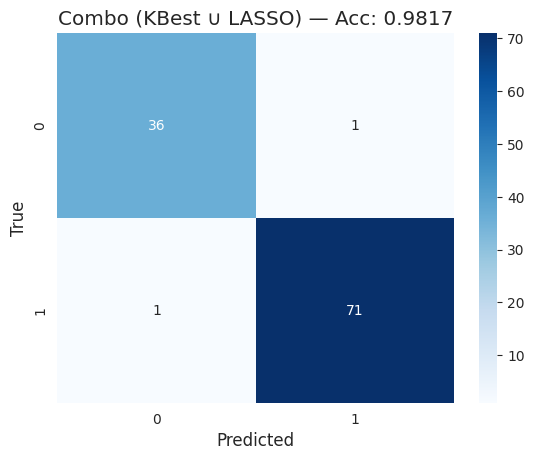

In [515]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np

def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(title + f" — Acc: {accuracy_score(y_true, y_pred):.4f}")
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# ---------- KBest (k=8) ----------
k = 8
kbest = SelectKBest(score_func=f_classif, k=k).fit(X_train_standard, y_train_clean)
Xtr_k = kbest.transform(X_train_standard)
Xte_k = kbest.transform(X_test_standard)
feats_k = X_train_standard.columns[kbest.get_support()].tolist()

clf_k = LogisticRegression(max_iter=1000).fit(Xtr_k, y_train_clean)
pred_k = clf_k.predict(Xte_k)
print(f"KBest (k={k}) Accuracy: {accuracy_score(y_test_clean, pred_k):.4f}")
print("KBest features:", feats_k)
show_cm(y_test_clean, pred_k, f"KBest (k={k})")

# ---------- LASSO (alpha=0.1 → C=10) ----------
C = 10.0  # 1/alpha
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=2000)
lasso.fit(X_train_standard, y_train_clean)
coef = lasso.coef_.ravel()
mask_l1 = coef != 0
feats_l1 = X_train_standard.columns[mask_l1].tolist()

# Refit plain Logistic on selected L1 features (clean eval)
clf_l1 = LogisticRegression(max_iter=1000).fit(X_train_standard[feats_l1], y_train_clean)
pred_l1 = clf_l1.predict(X_test_standard[feats_l1])
print(f"LASSO (alpha=0.1) Accuracy: {accuracy_score(y_test_clean, pred_l1):.4f}")
print("LASSO features:", feats_l1)
show_cm(y_test_clean, pred_l1, "LASSO (alpha=0.1)")

# ---------- Combo = union(KBest ∪ LASSO) ----------
feats_combo = sorted(set(feats_k).union(feats_l1))
clf_combo = LogisticRegression(max_iter=1000).fit(X_train_standard[feats_combo], y_train_clean)
pred_combo = clf_combo.predict(X_test_standard[feats_combo])
print(f"Combo (union) Accuracy: {accuracy_score(y_test_clean, pred_combo):.4f}")
print("Combo features:", feats_combo)
show_cm(y_test_clean, pred_combo, "Combo (KBest ∪ LASSO)")


## Final Model Insight  




* The modeling process began with a baseline logistic regression model, which achieved an accuracy of 96%. This provided a strong starting point for comparison.

* Next, I performed outlier removal, keeping the proportion below 5% to preserve the dataset’s natural distribution. However, this step slightly decreased the model’s performance to 93.58%, suggesting that some outliers contained useful information for prediction.

* Following this, I applied feature selection using p-values, but the accuracy remained at 93.58%, indicating that statistical significance alone did not improve predictive power.

* To enhance model performance, I introduced data scaling. Using the Min-Max Scaler, the accuracy improved to 97%, and with the Standard Scaler, the model achieved 98.17%, proving that scaling had a major positive effect on performance and model stability.

* Since the Standard Scaler gave the best results, it was used for subsequent feature selection methods. I applied SelectKBest with values of k ranging from 1 to 10 and found that the best-performing model occurred at k = 8, reaching an accuracy of 97.25%.

* To further refine the model, I used LASSO (L1 regularization) for feature selection. The best accuracy obtained was also 97.25% when the regularization parameter α = 0.1.

* Finally, I combined both KBest (k=8) and LASSO (α=0.1) selected features, which resulted in the highest accuracy of 98.17%. This combined model not only achieved the best overall performance but also demonstrated the most balanced and reliable feature set.

* The final model (Logistic Regression with Standard Scaling + Combined KBest & LASSO feature selection) is selected as the best-performing and most stable predictive model for this dataset.

## Conclusion statement

* During data exploration, I examined histograms for all features to understand their distributions. Most features showed right-skewed or bimodal patterns, while others like smoothness and symmetry were approximately normally distributed.

* The correlation matrix revealed strong relationships between size-related variables (mean radius, perimeter, area) and weaker relationships among texture and shape variables, which justified removing redundant features later on.

* Two multivariate visualizations were created to explore feature relationships:

- The first plot (Mean Compactness vs. Mean Concave Points, colored by Smoothness) showed that less smooth tumors tend to be more compact and irregular.

- The second plot (Mean Area vs. Mean Concave Points, colored by Fractal Dimension) showed that larger tumors have more irregular shapes and lower fractal dimension values, patterns often linked to malignancy.

* No missing values were found in the dataset, and less than 5% of outliers were removed to maintain data integrity while avoiding extreme bias.

* Feature lists were extracted after selection methods:

- KBest (k=8) retained the most statistically significant variables for classification.

- LASSO (α=0.1) kept only the variables with nonzero coefficients, removing less relevant ones.

* The combination model leveraged the strengths of both techniques by selecting features present in either method.

* When comparing all models, the combined KBest + LASSO model offered the best balance between accuracy (98.17%), efficiency, and interpretability and it It was cheap enough.
Models using fewer but more meaningful features proved to be computationally cheaper and less prone to overfitting, making them ideal for practical deployment.